<a href="https://colab.research.google.com/github/Hend-10/D.R.U.G/blob/master/PDFTOIMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

In [ ]:
def pdf_to_images(pdf_path):
    pdf_document = fitz.open(pdf_path)
    images = []
    for page_number in range(pdf_document.page_count):
        page = pdf_document[page_number]
        images.append(page.get_pixmap())
    return images

In [ ]:
!pip install pdf2image

In [12]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (234 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


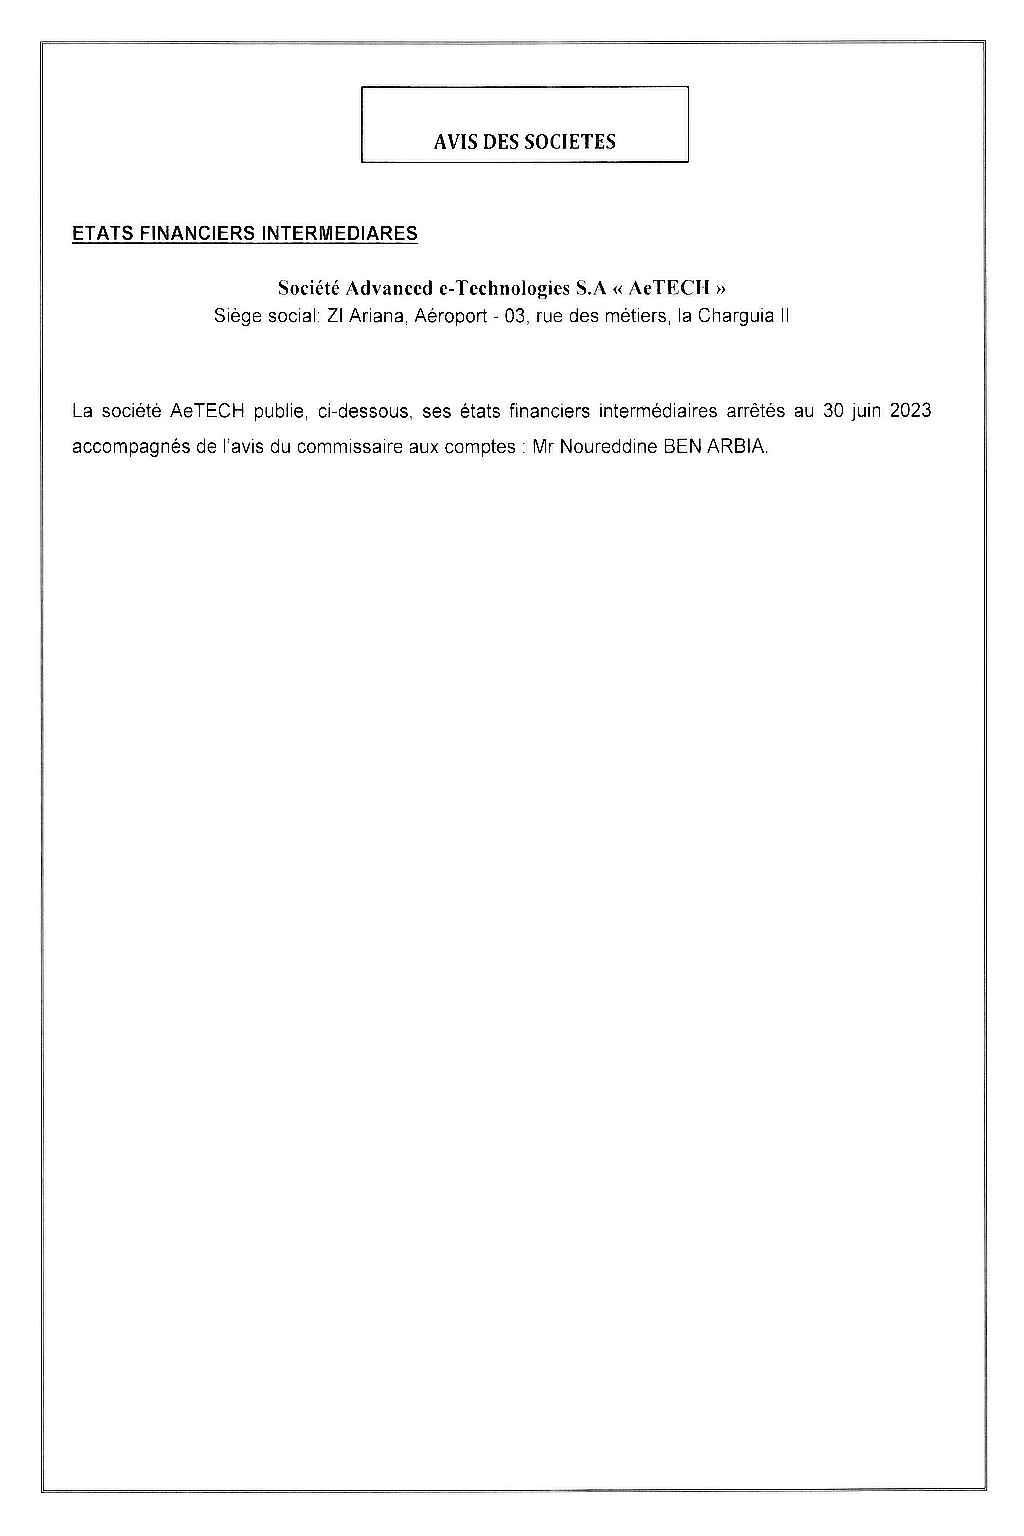

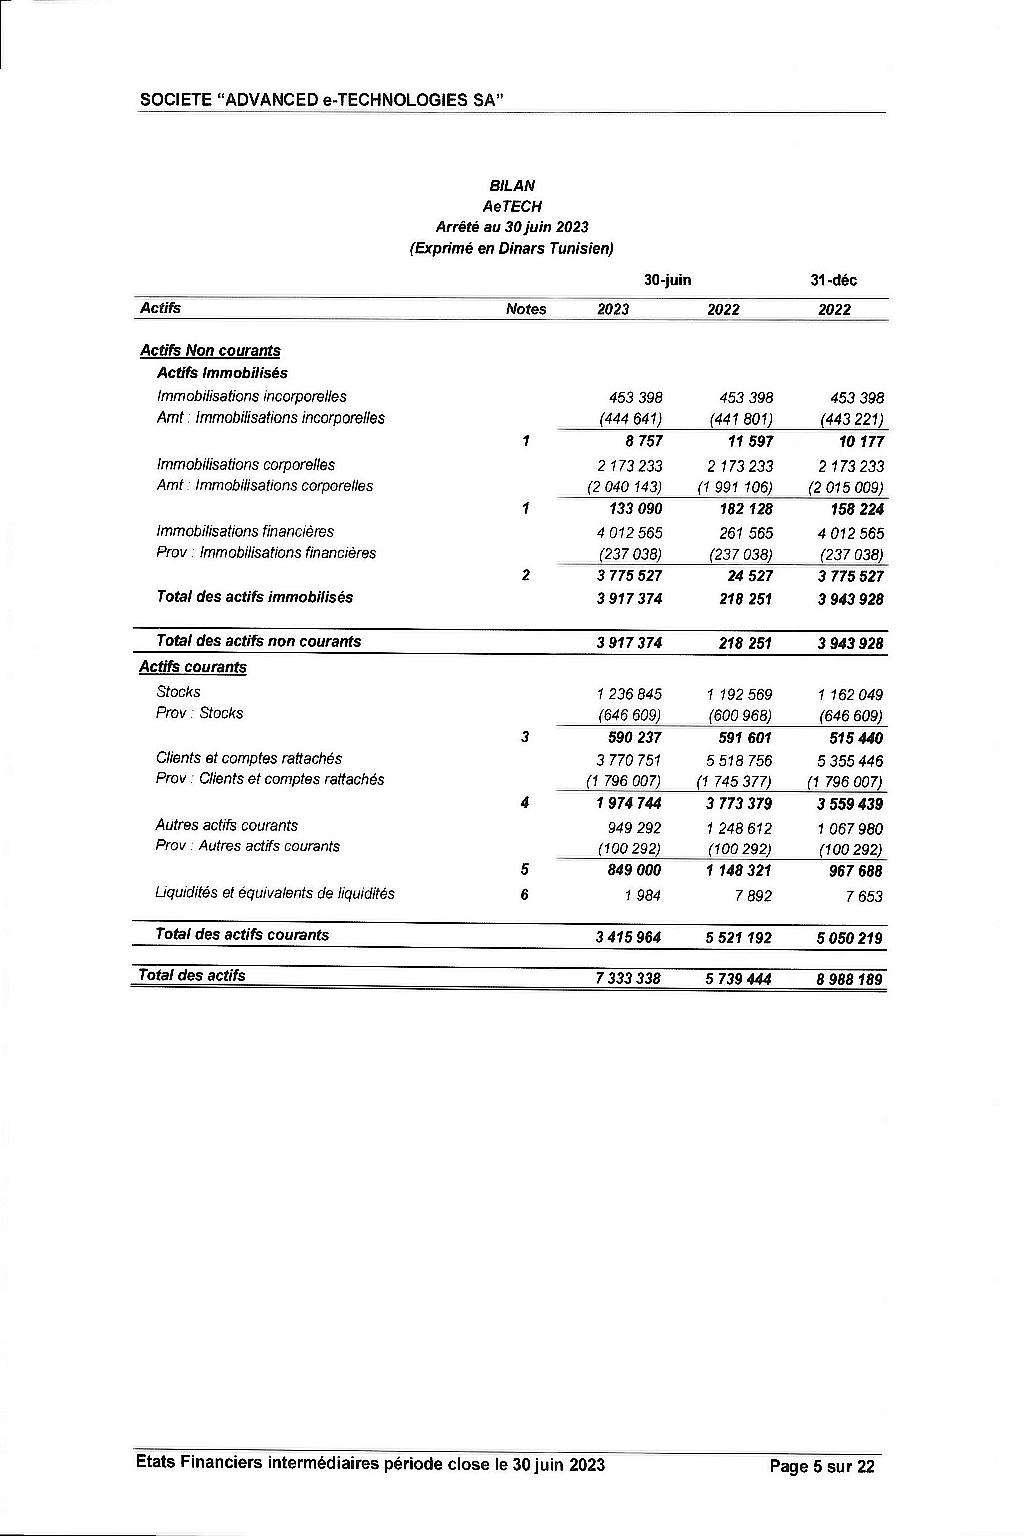

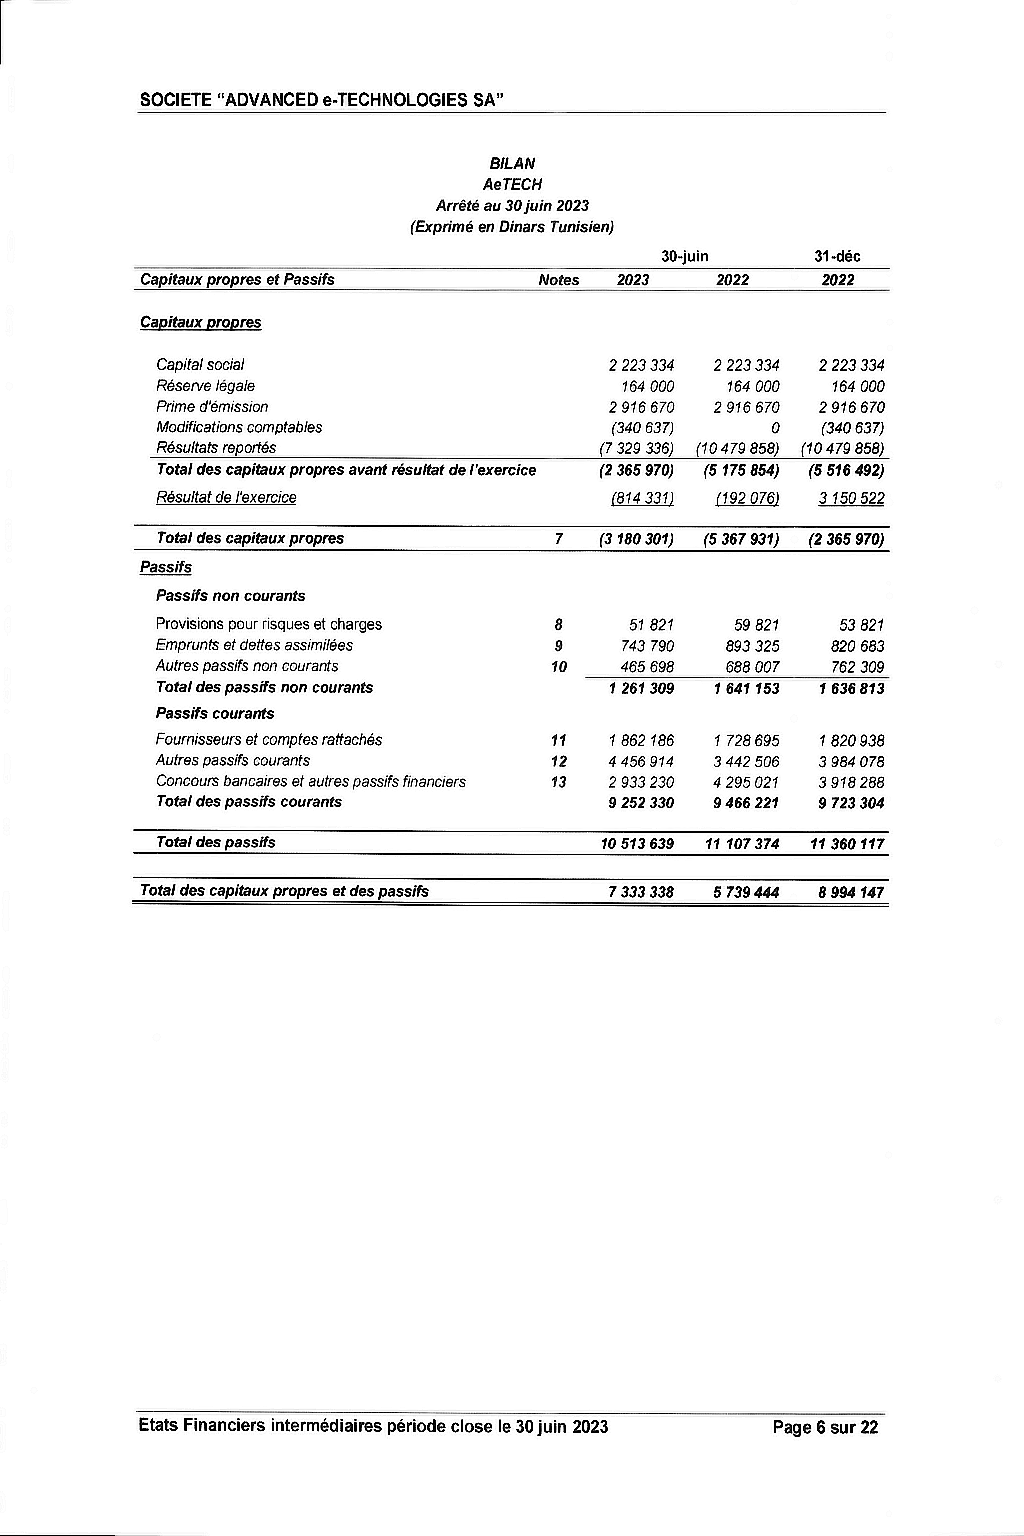

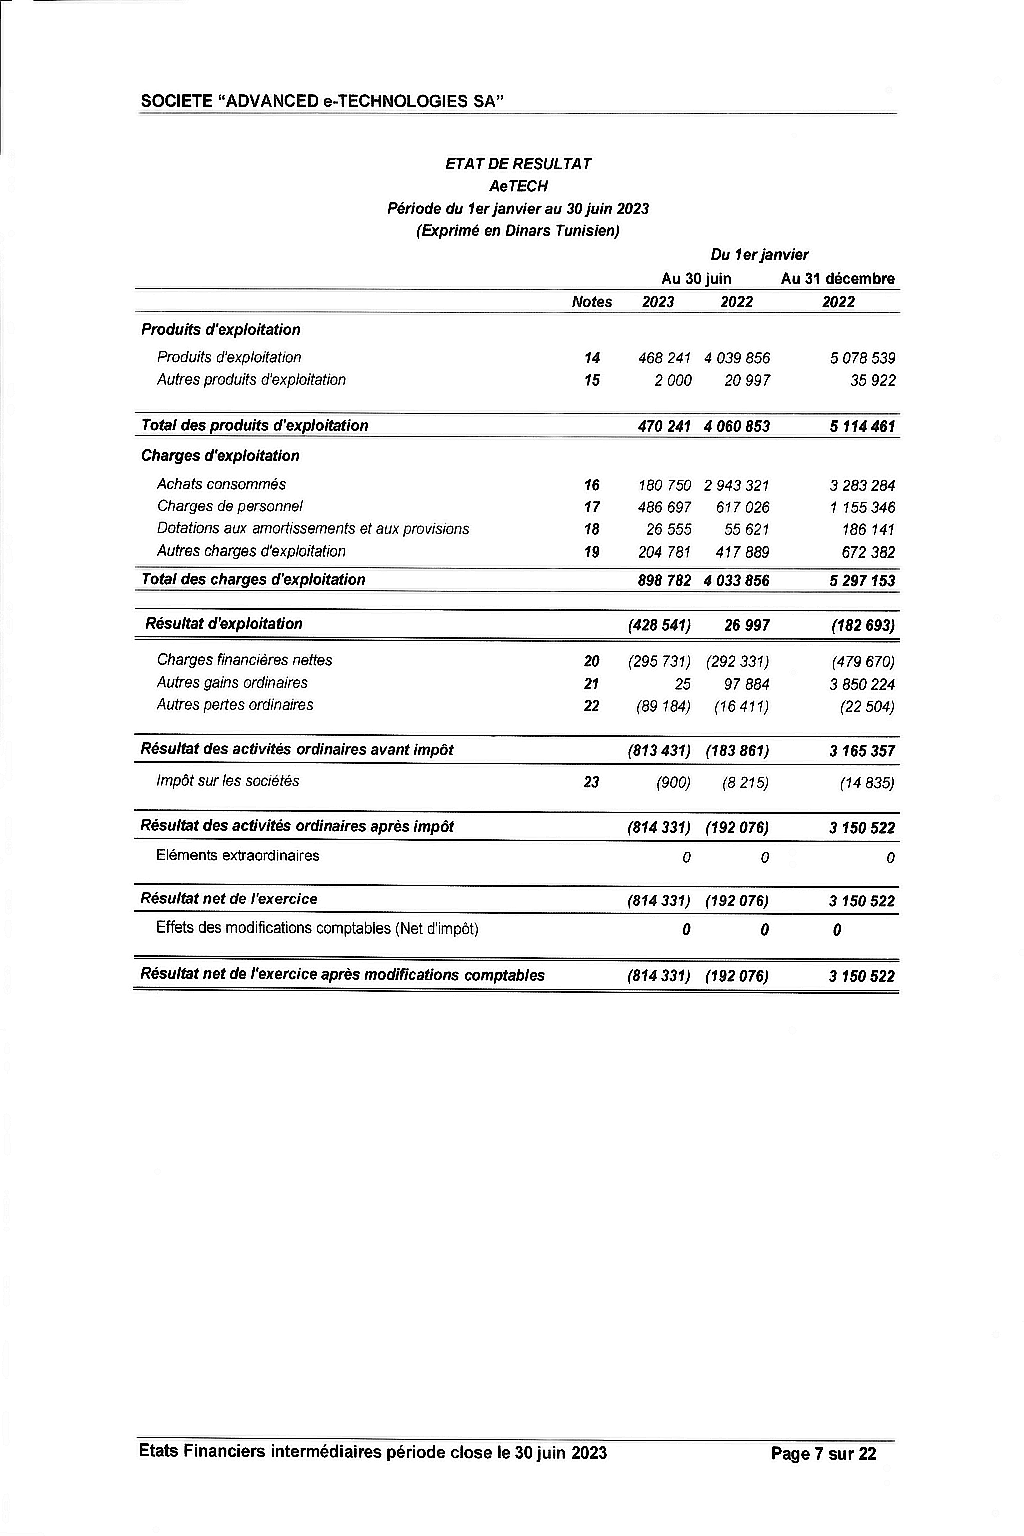

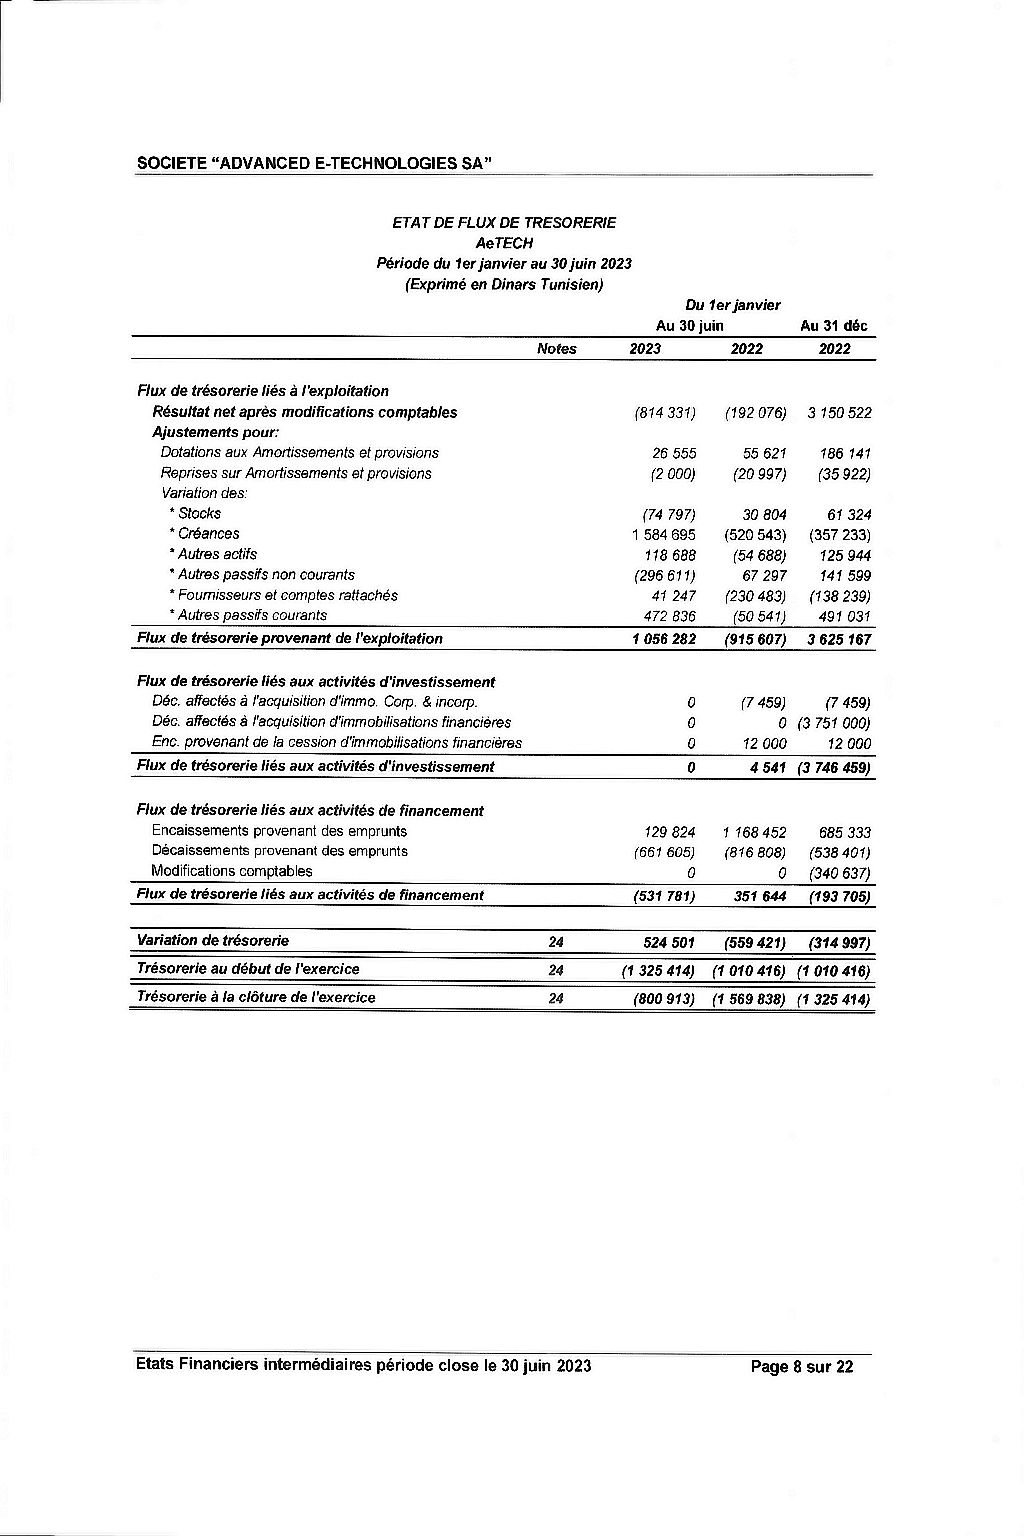

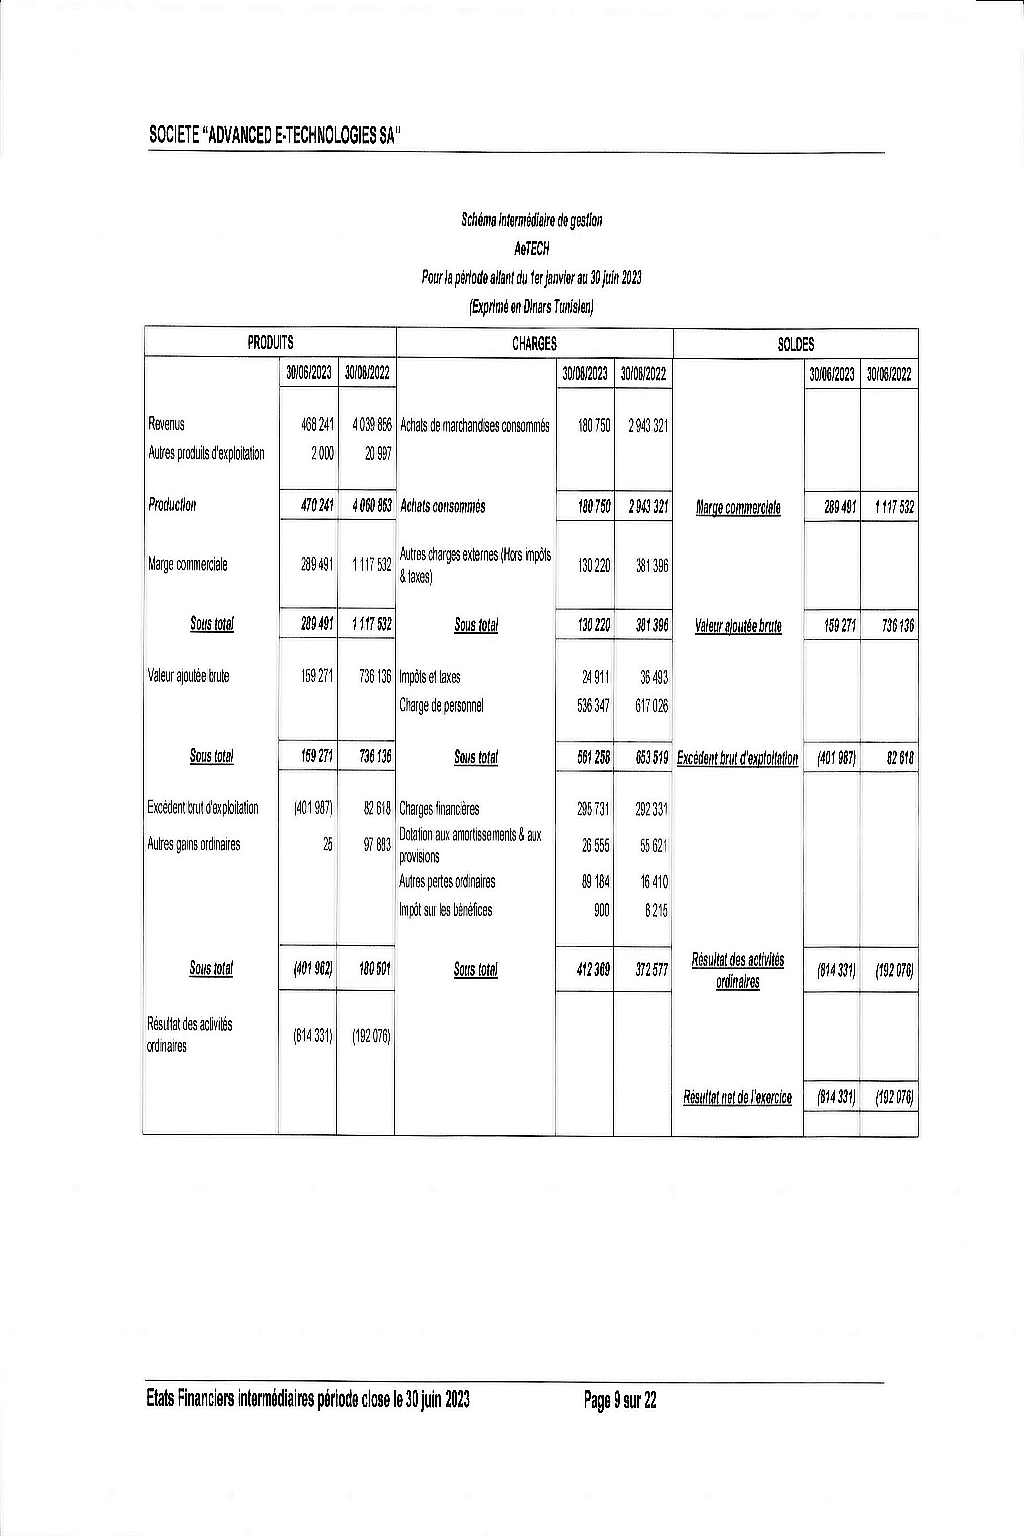

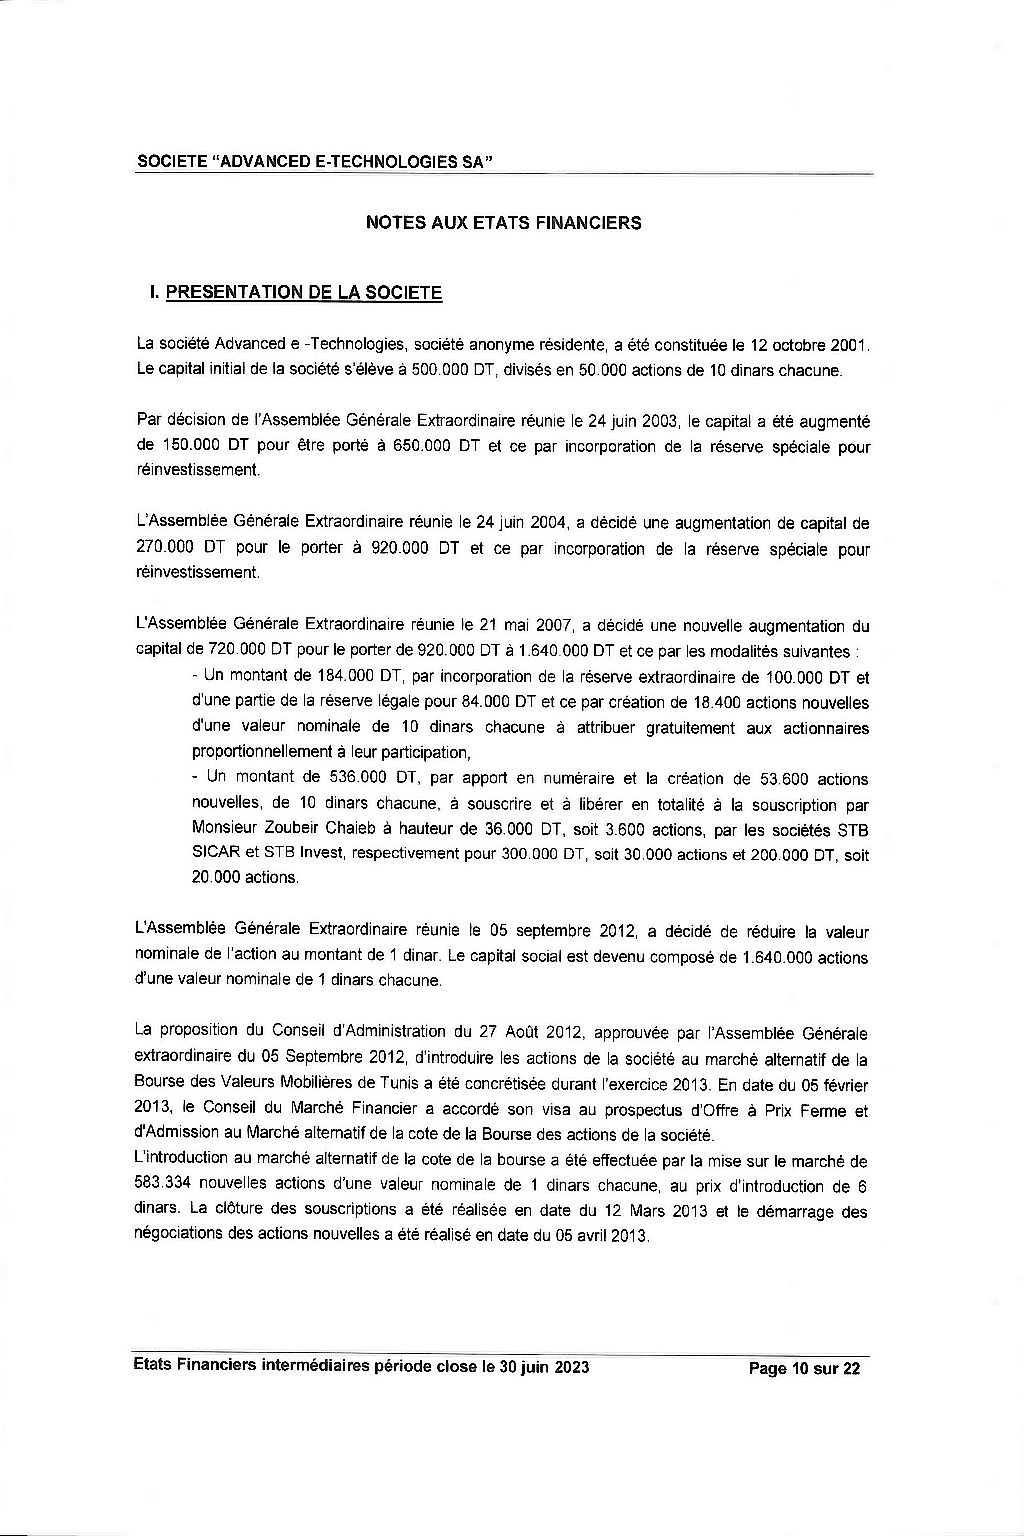

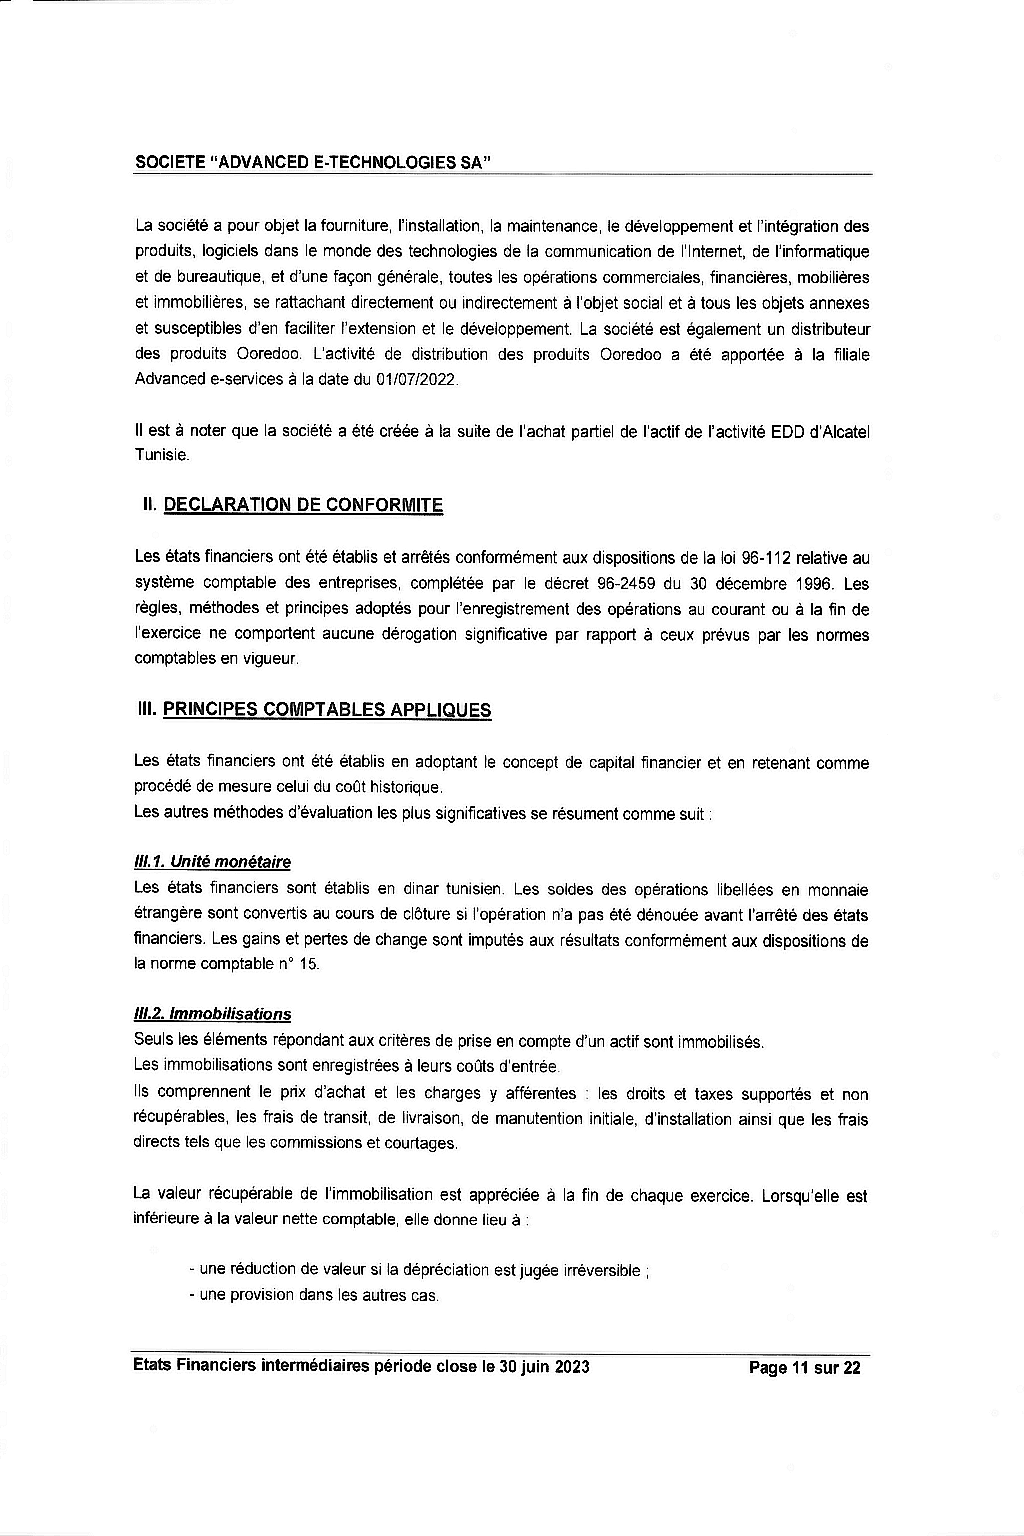

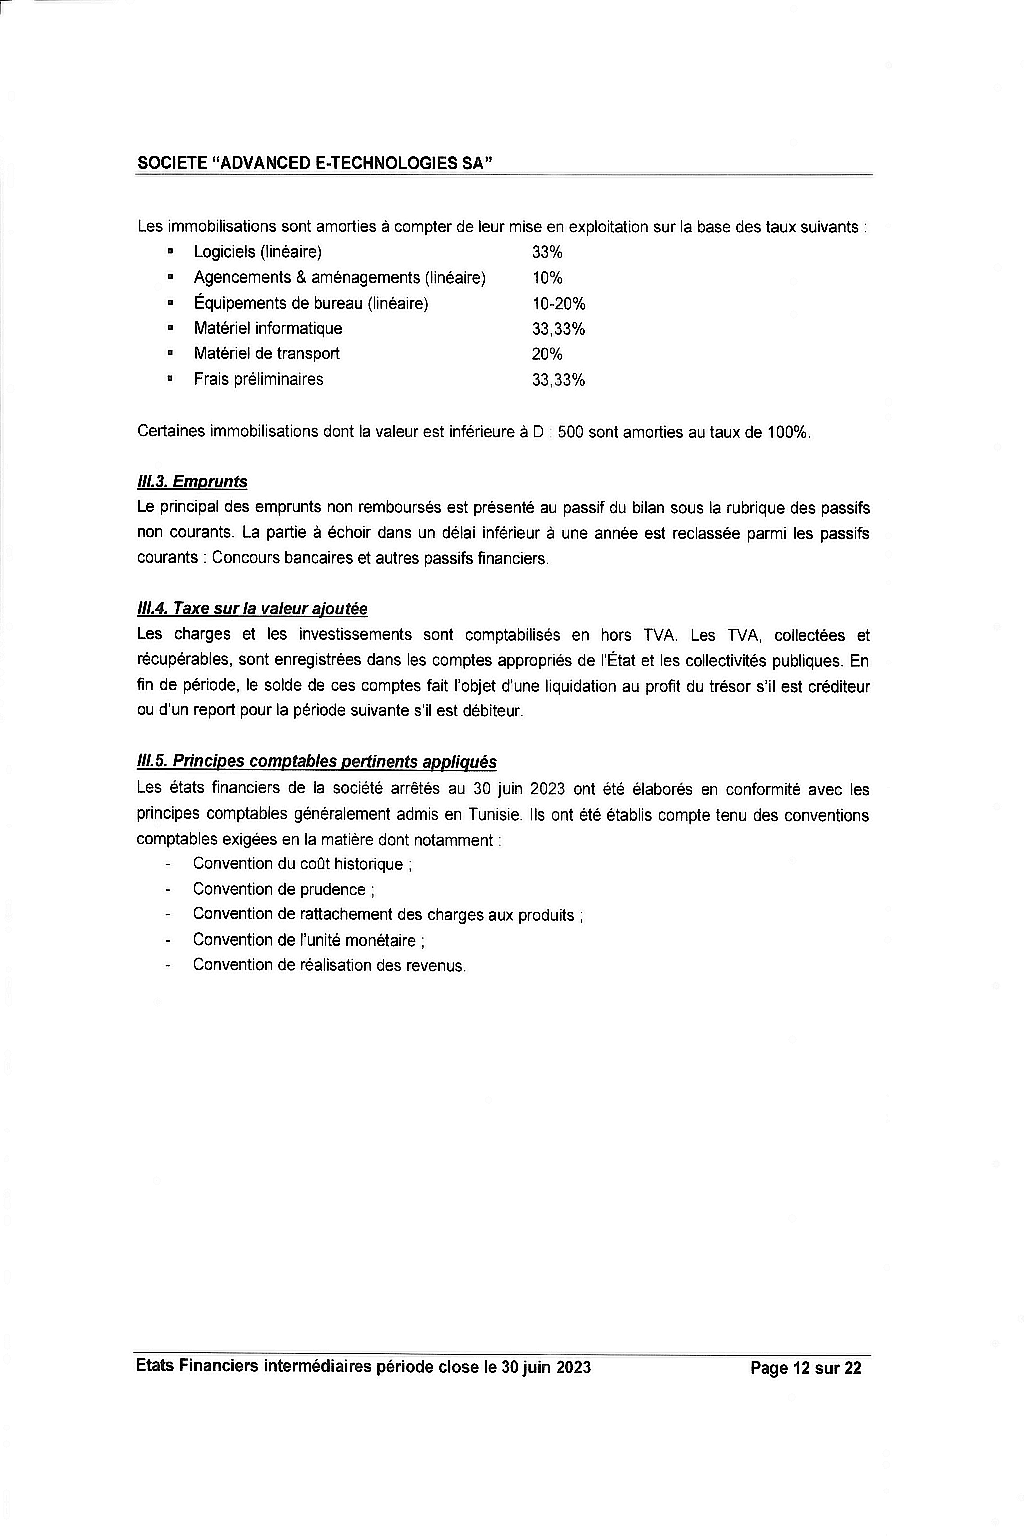

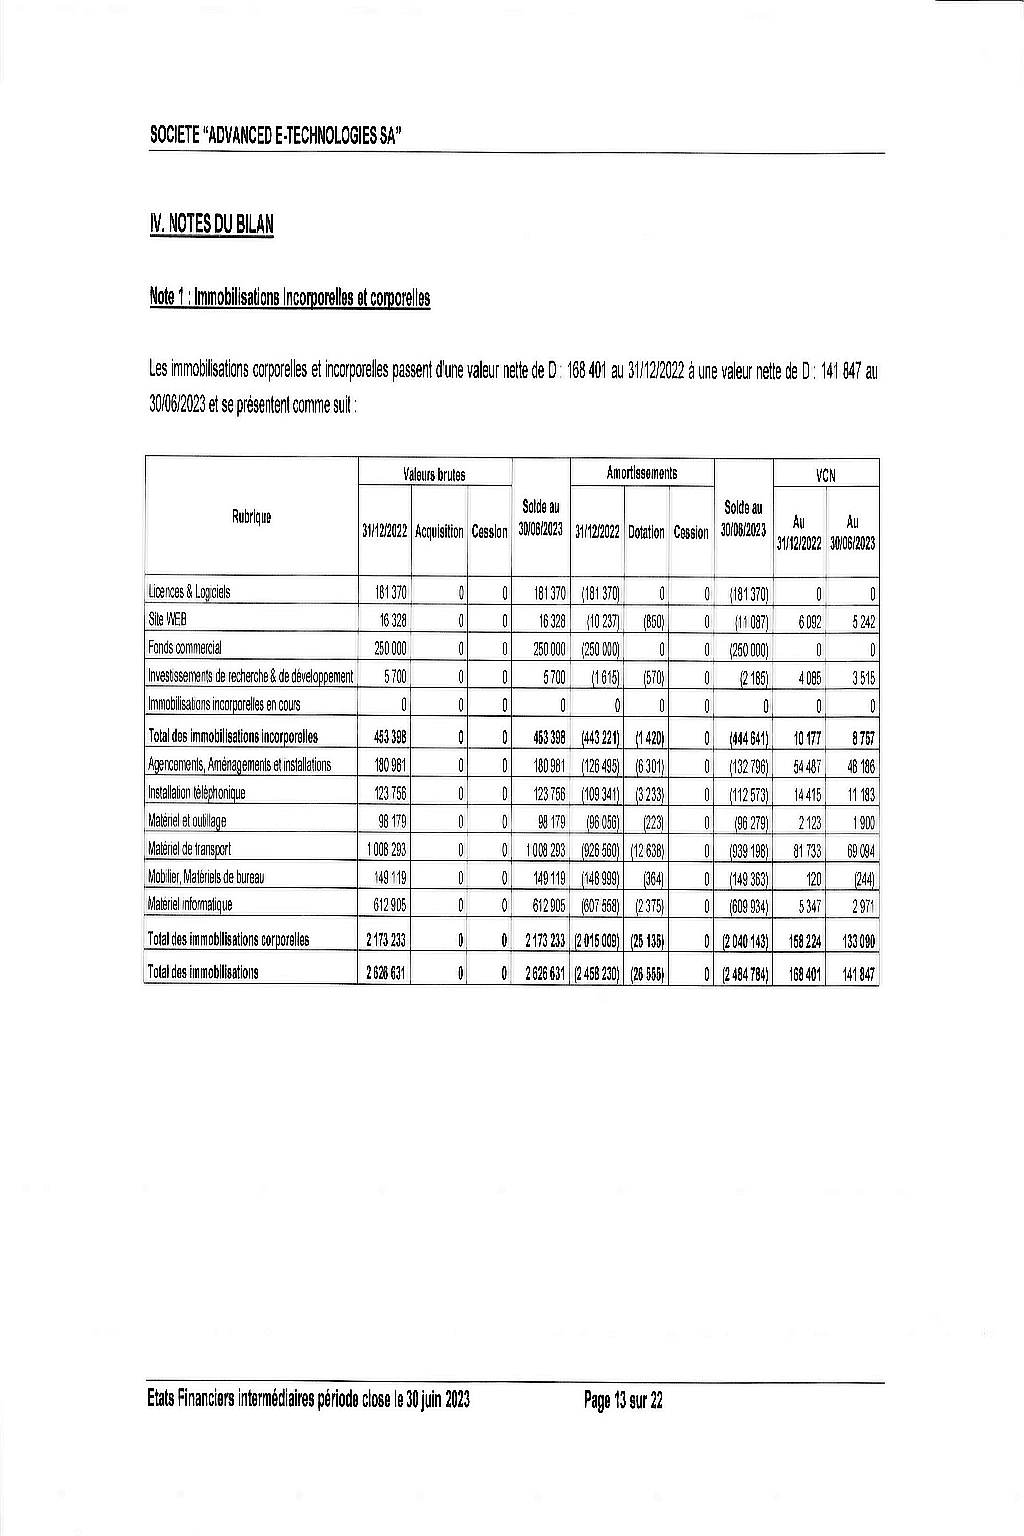

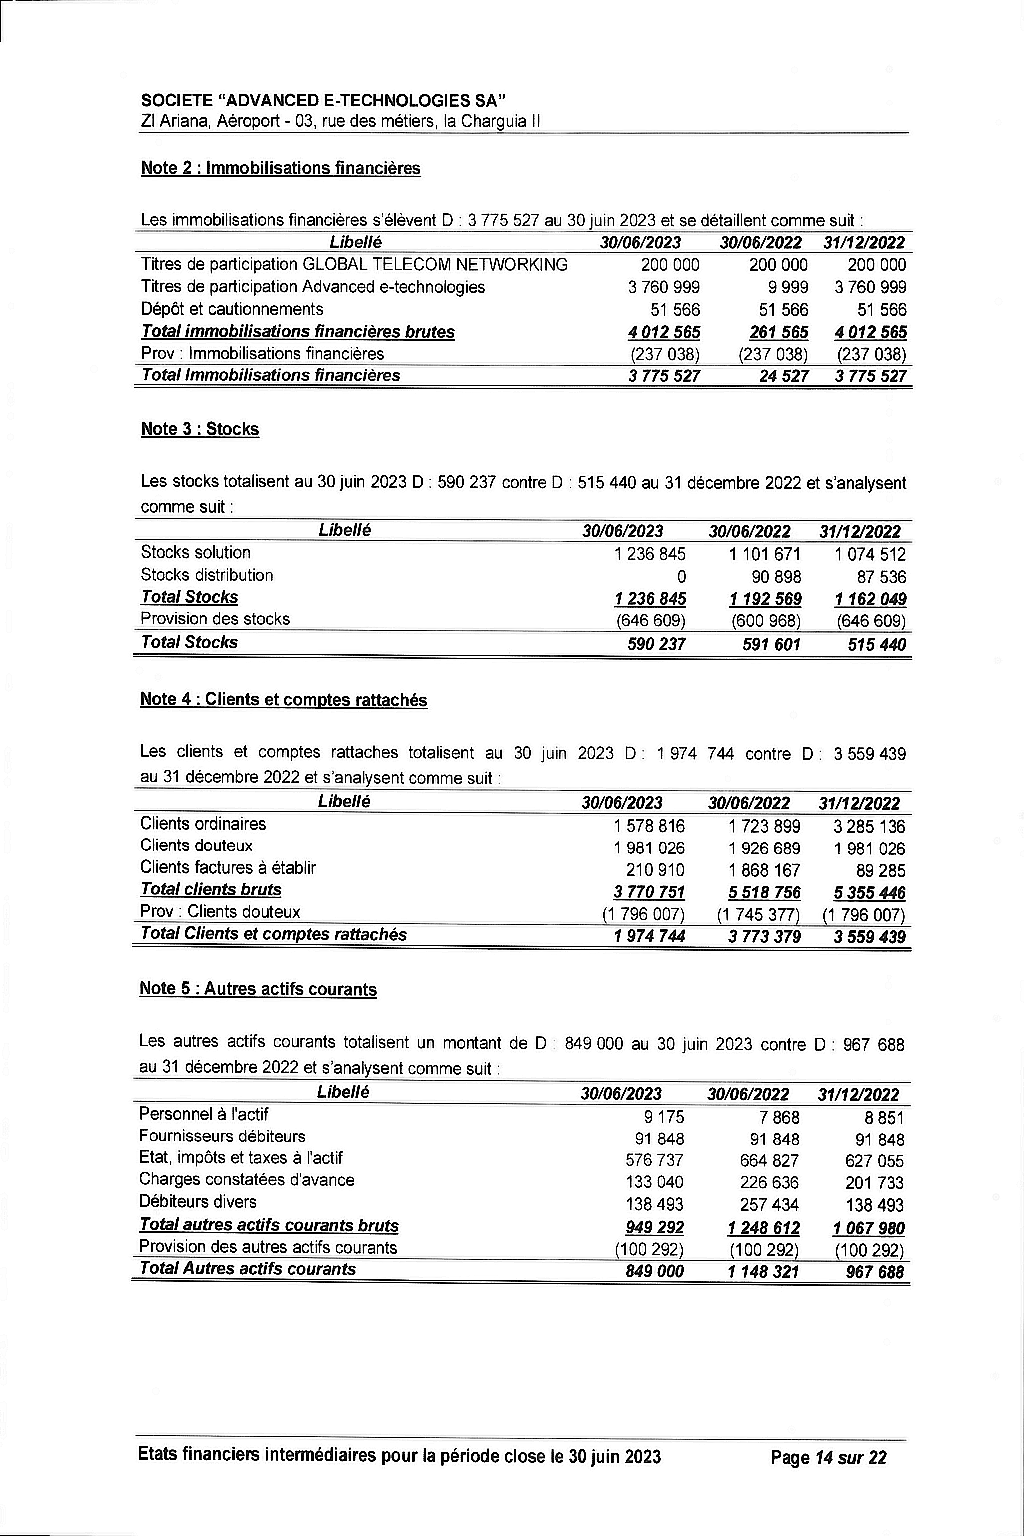

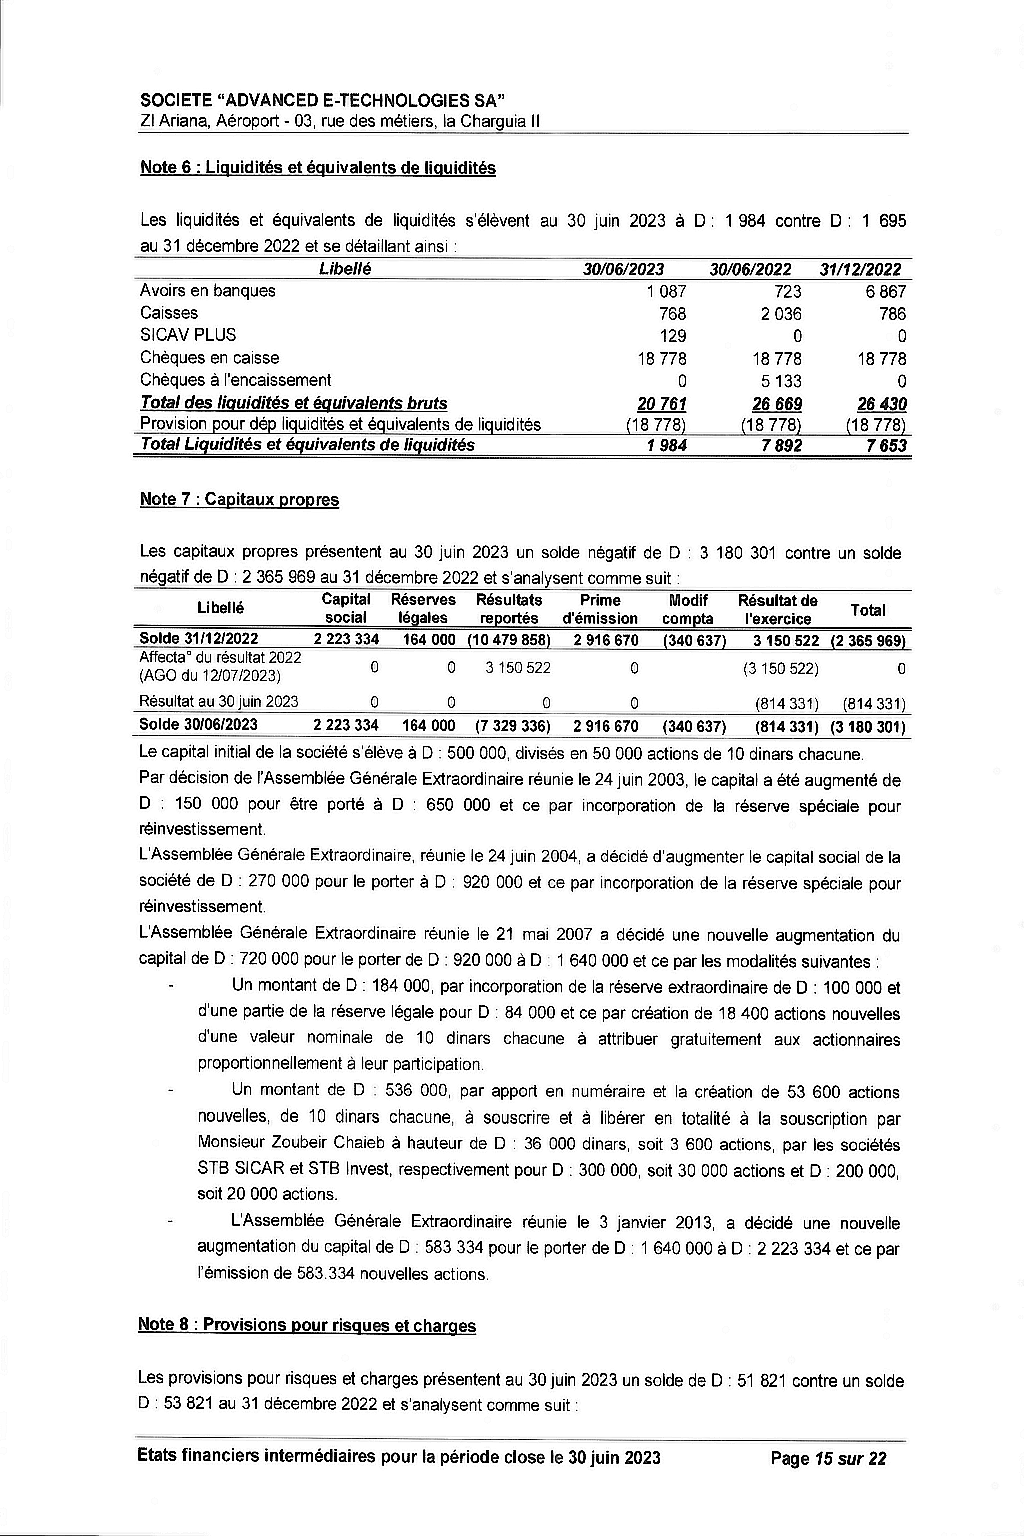

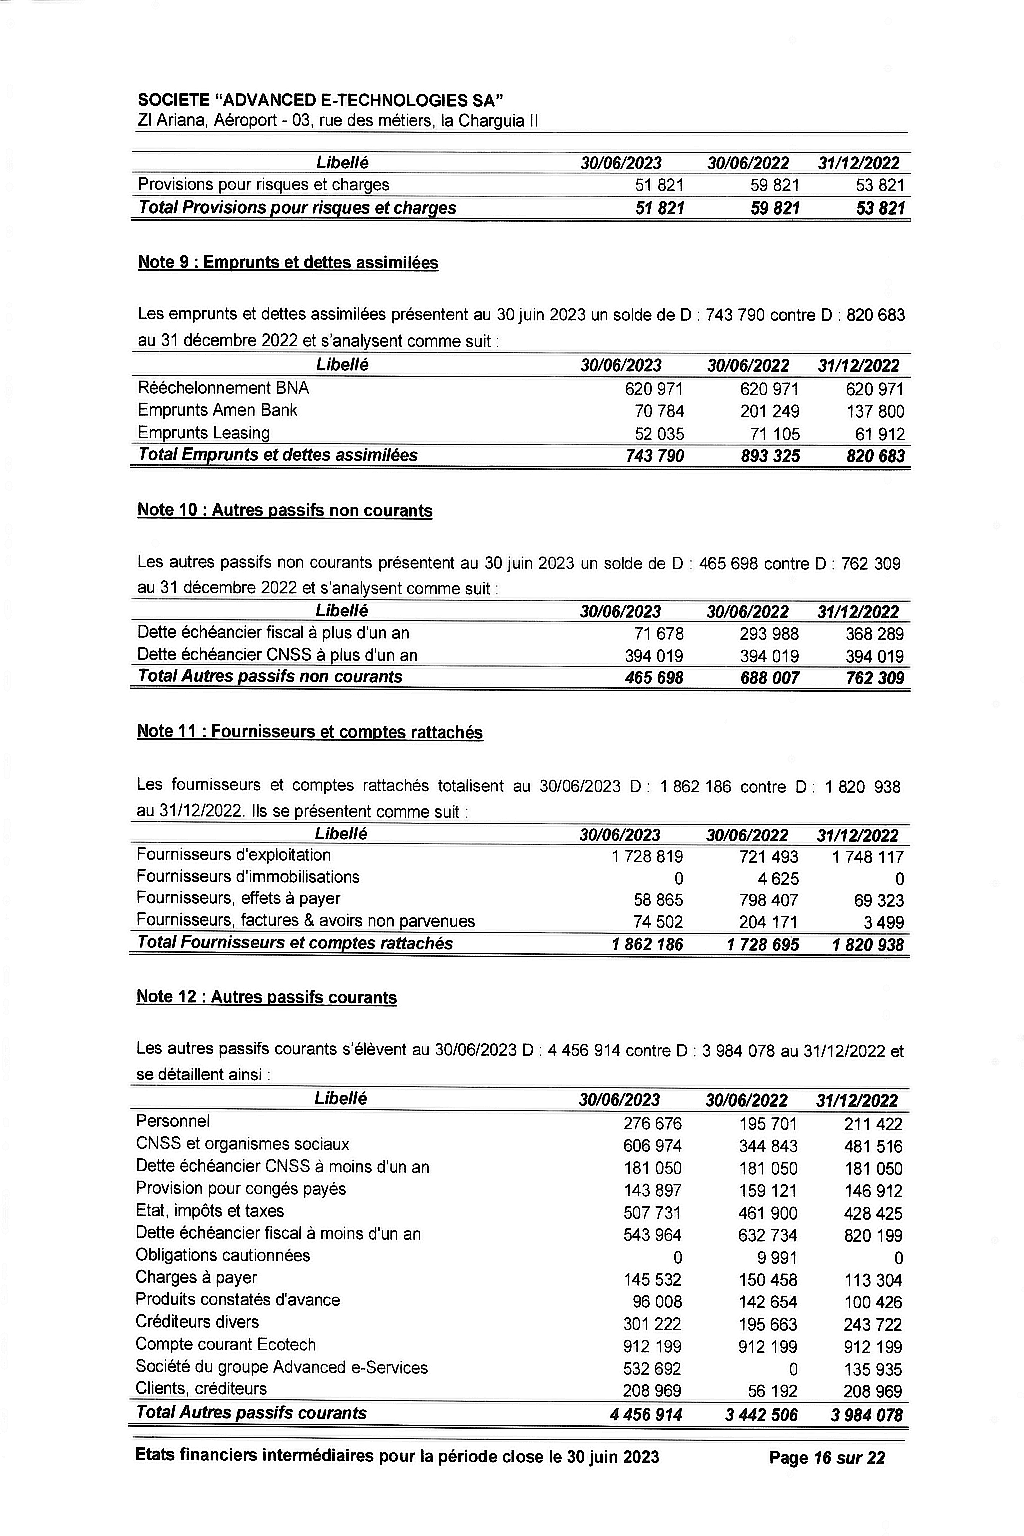

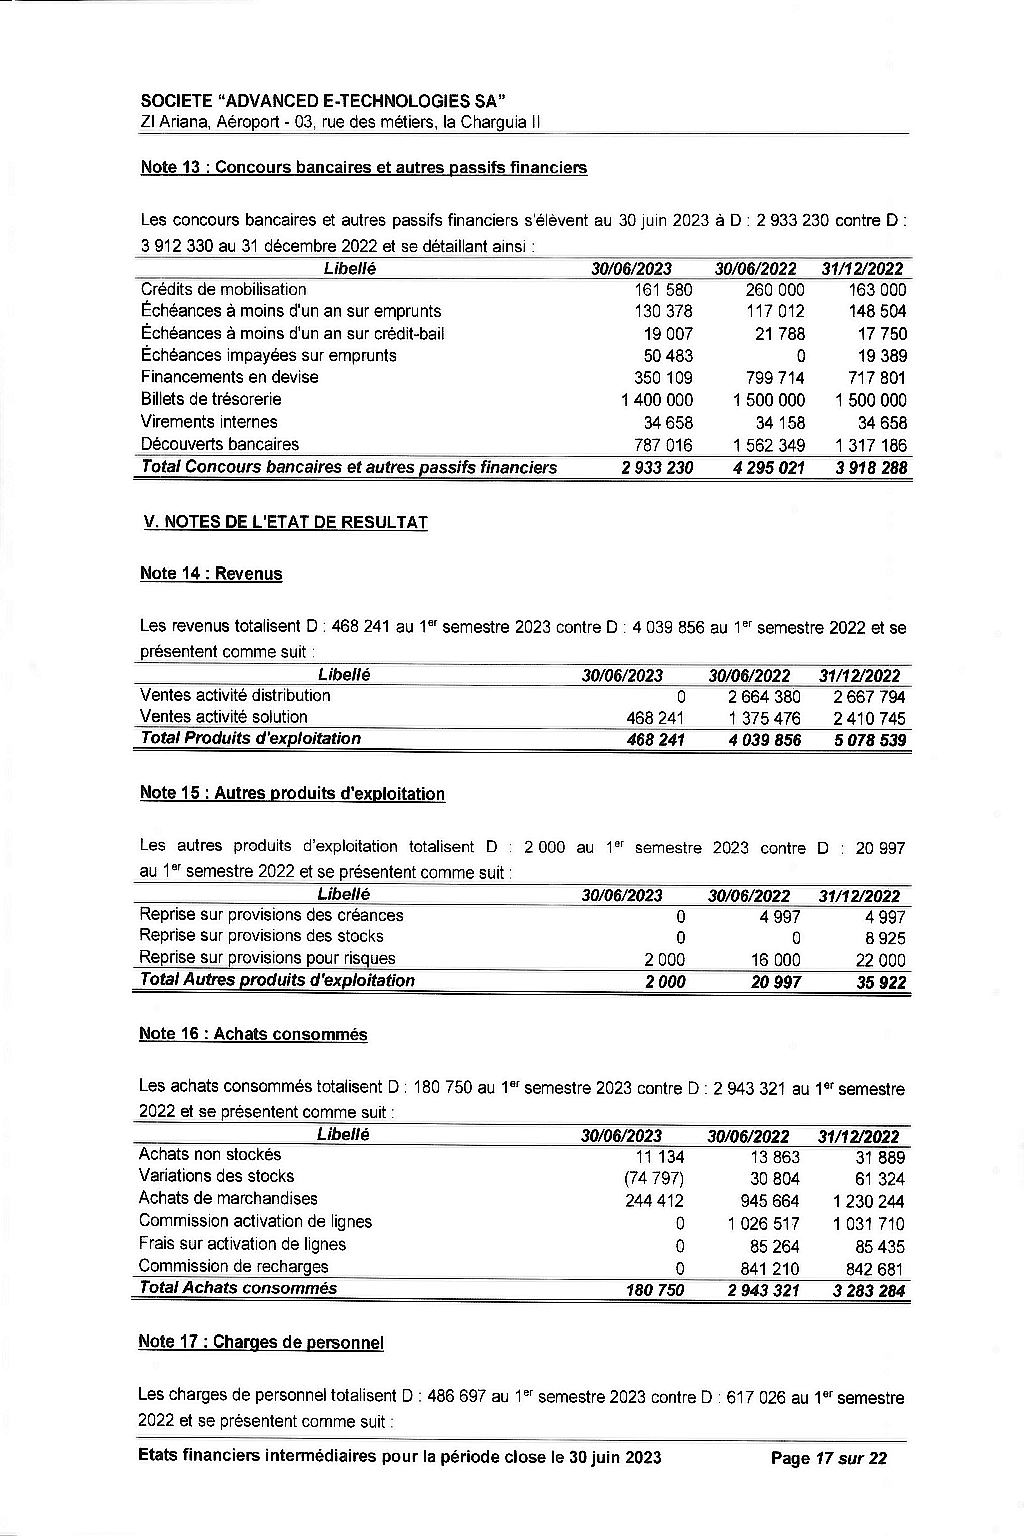

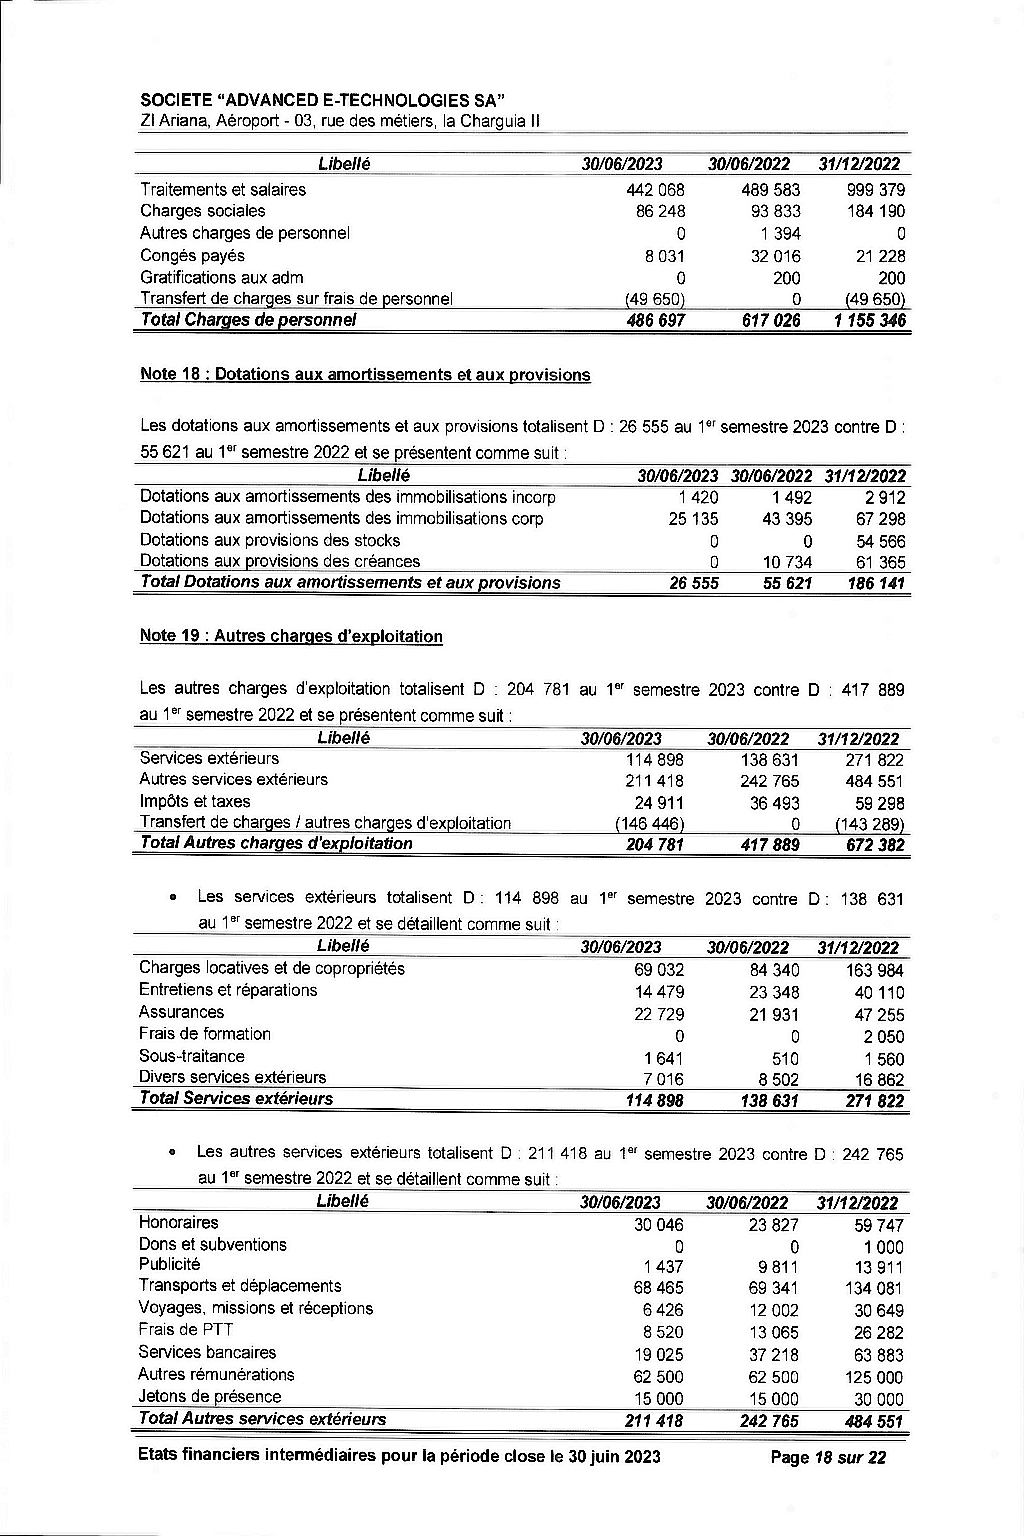

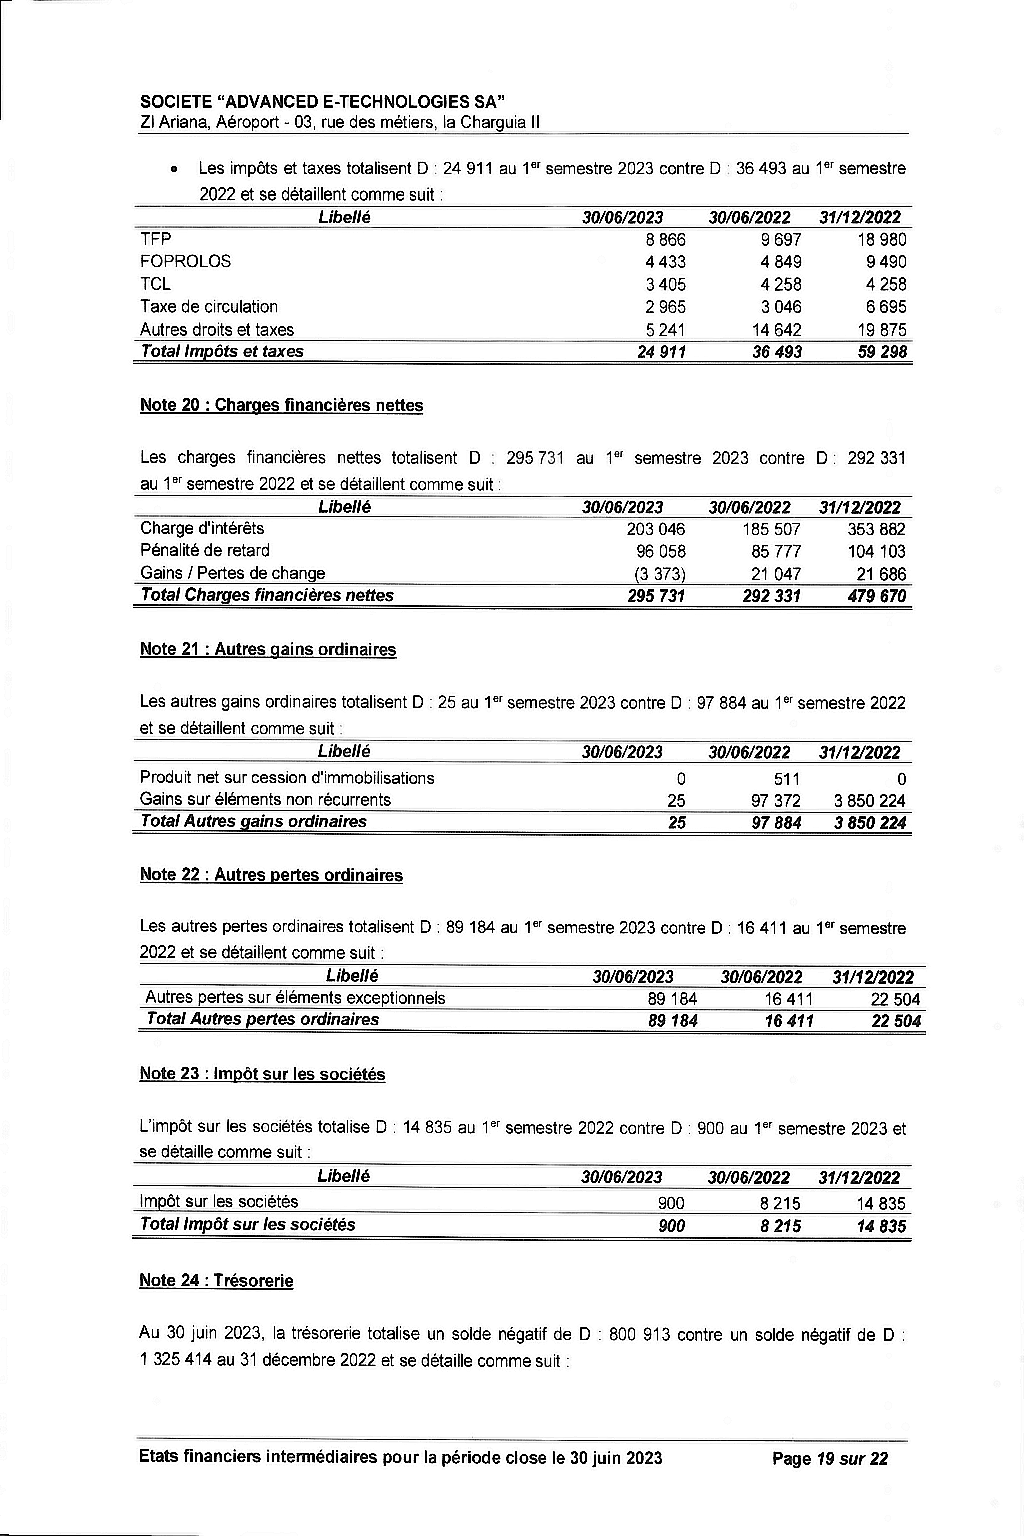

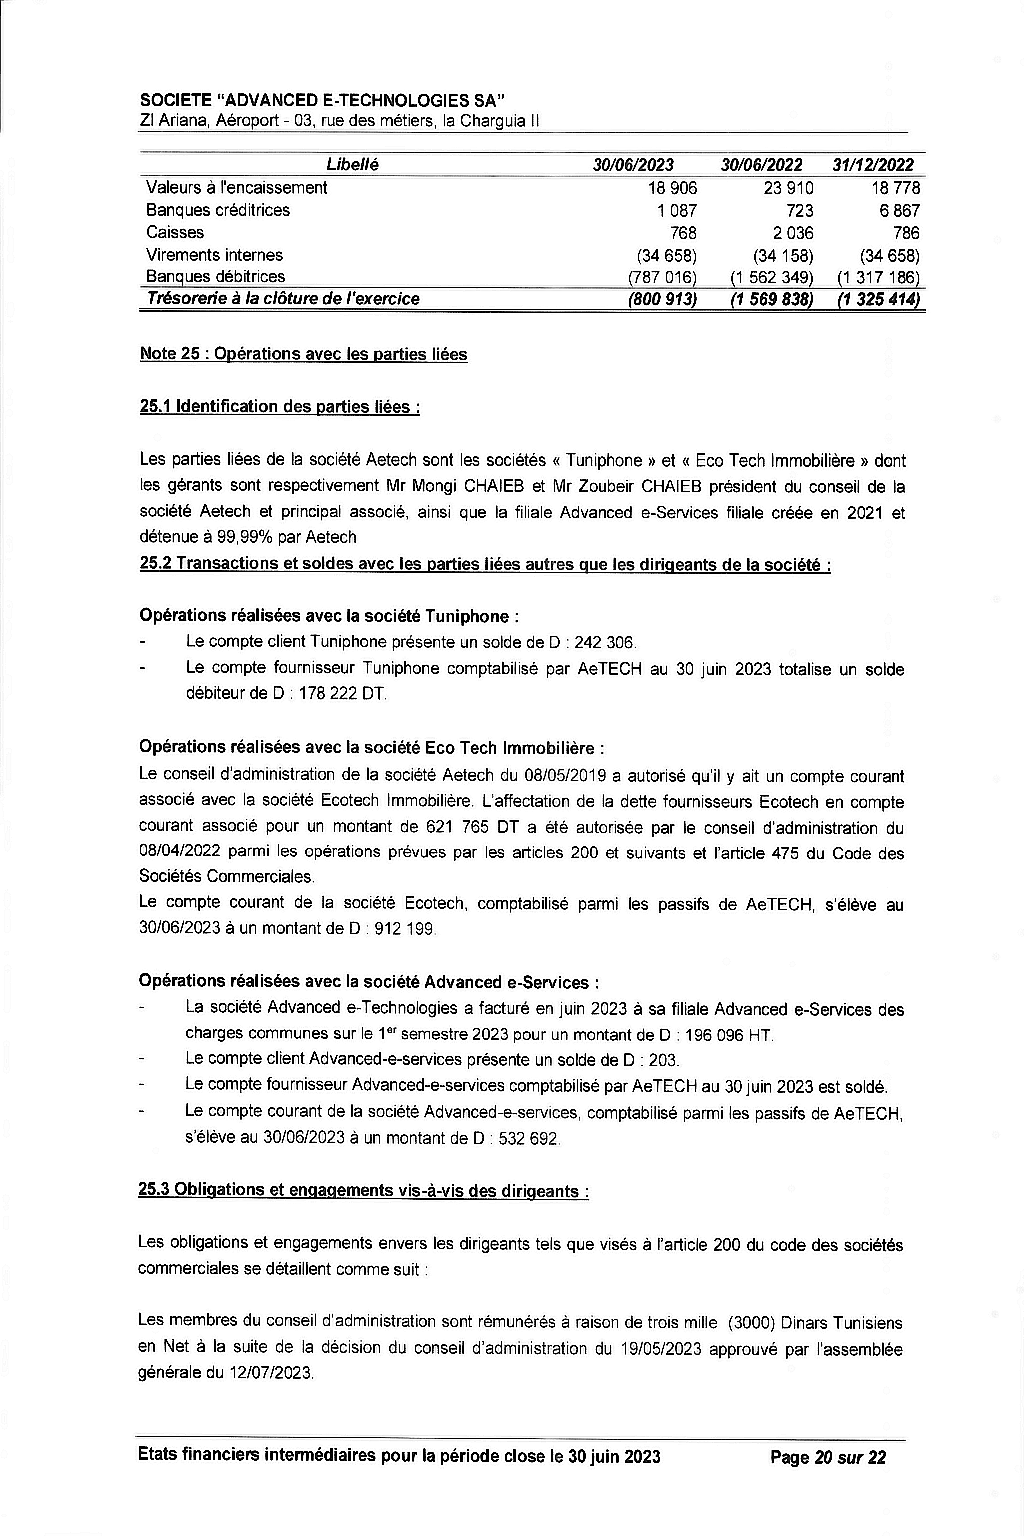

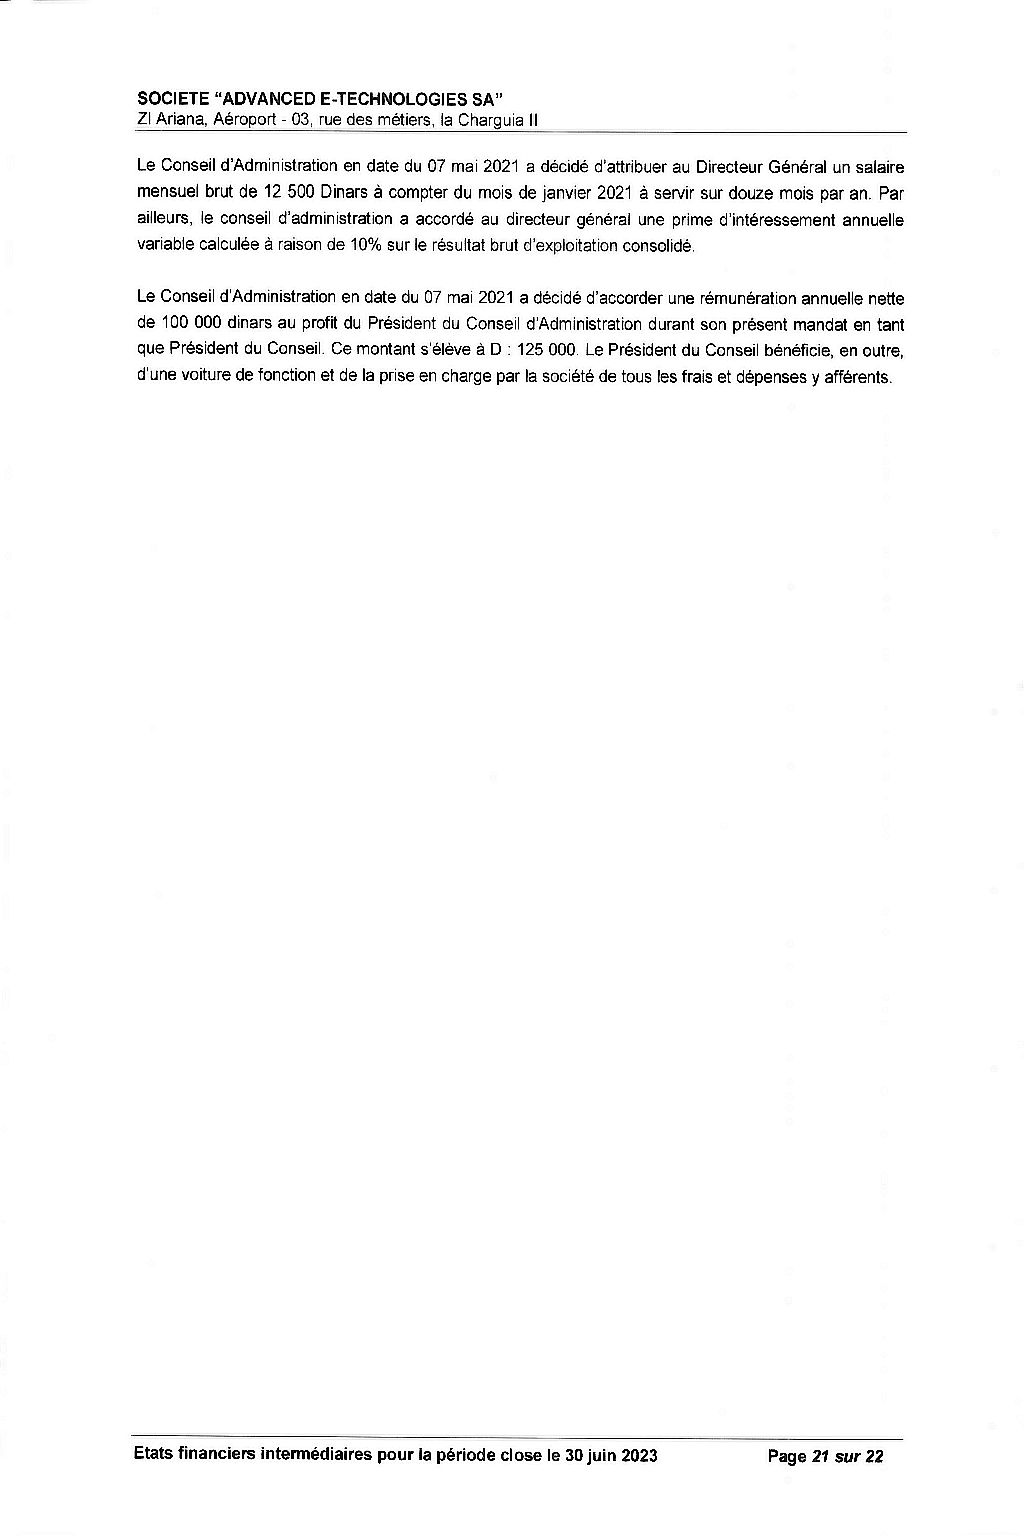

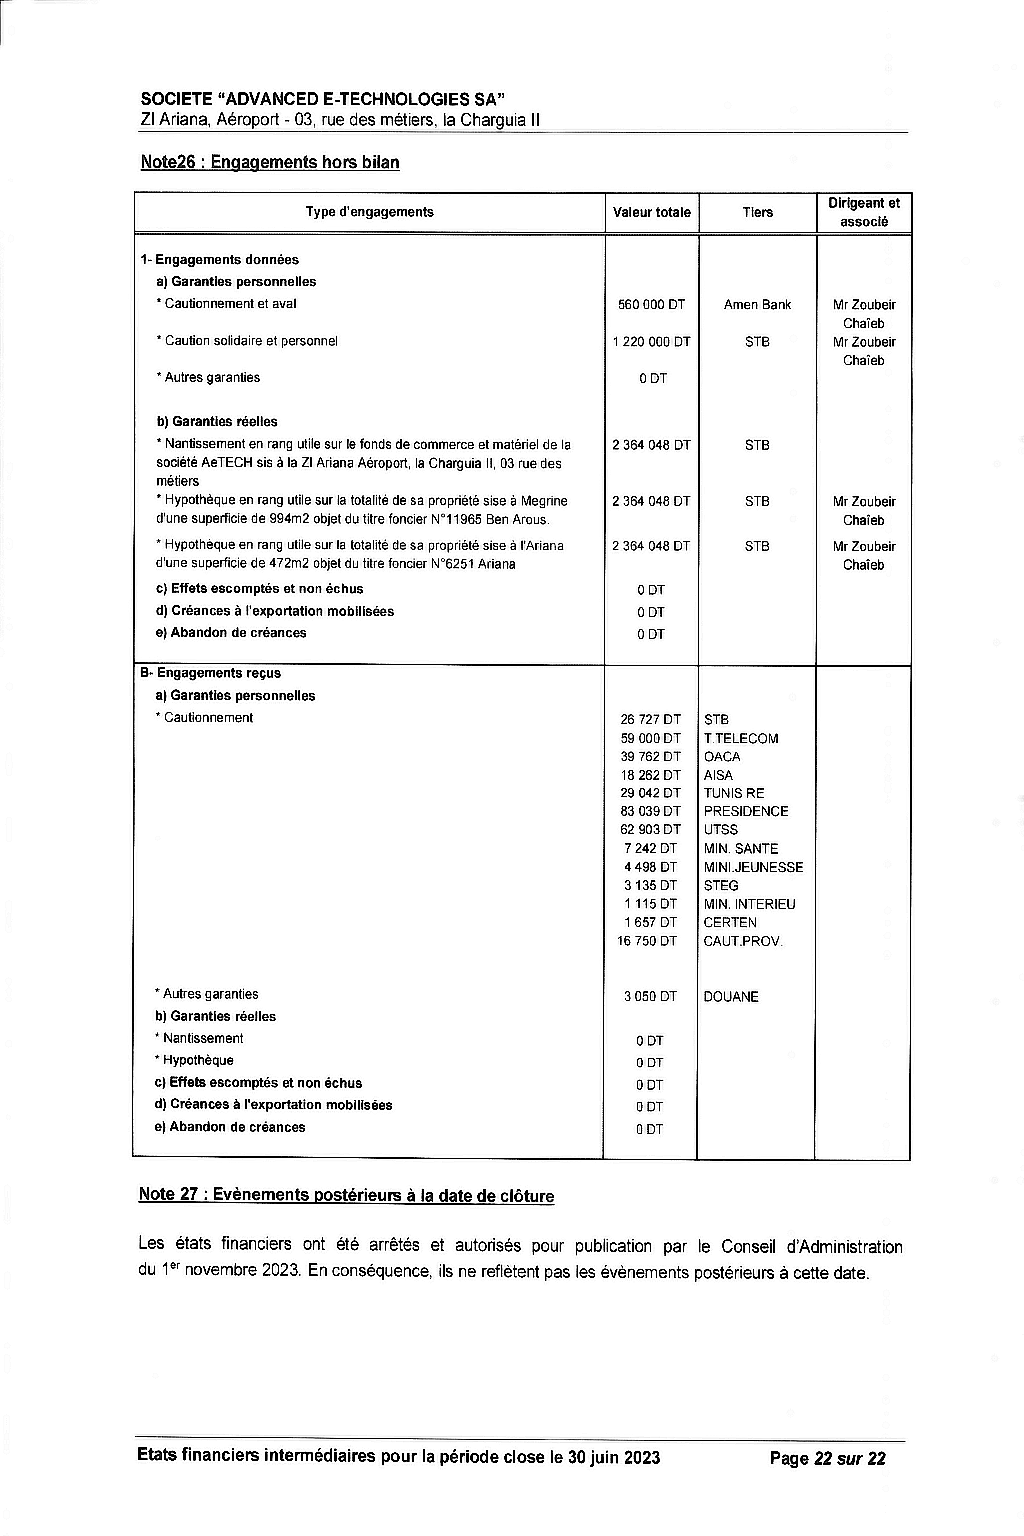

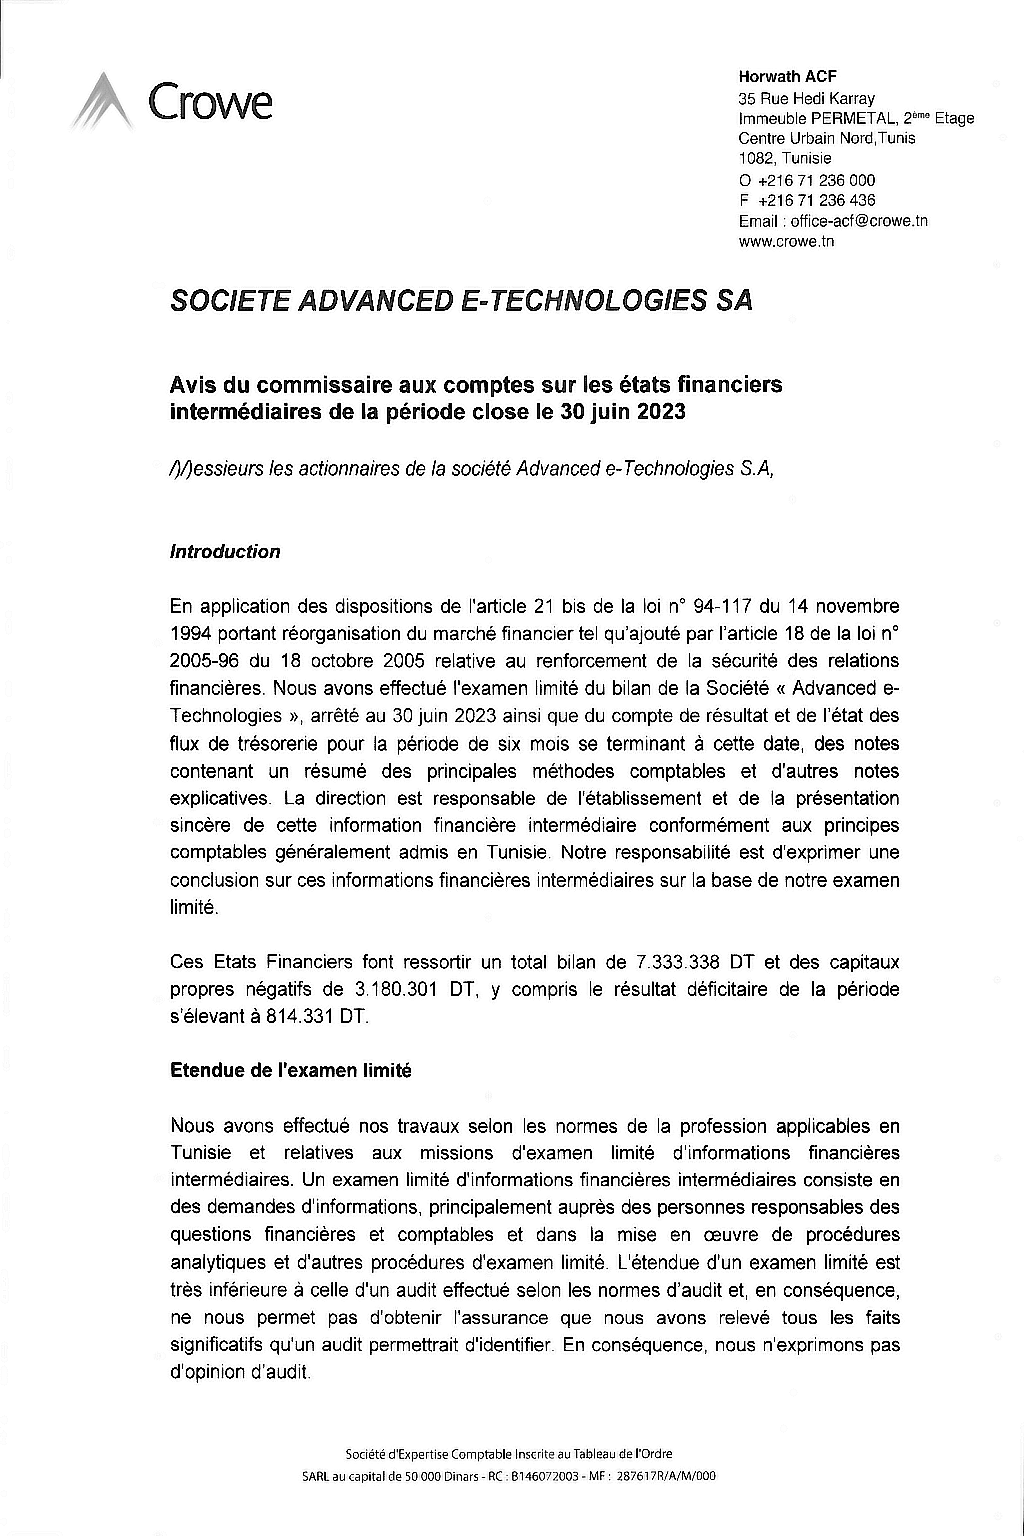

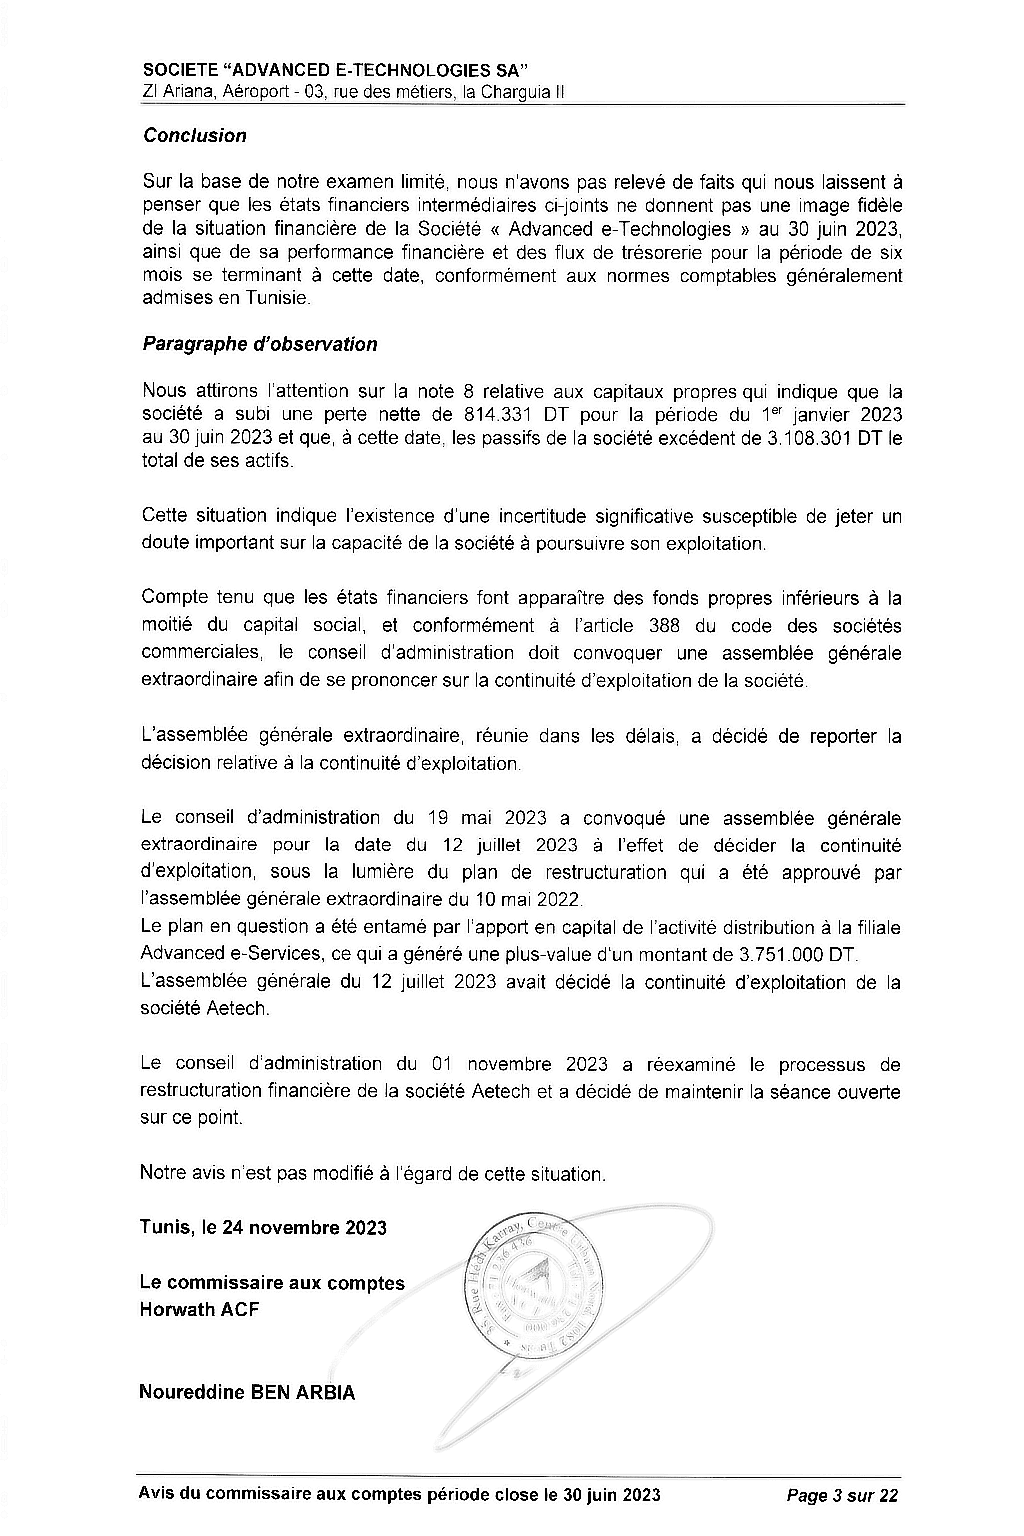

In [13]:
from pdf2image import convert_from_path
import cv2
from google.colab.patches import cv2_imshow

pdf_path = "aetech_efi300623.pdf"
images = convert_from_path(pdf_path)

# Iterate through the images
for pdf_image in images:
    # Convert PIL image to NumPy array
    image_array = np.array(pdf_image)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

    # Resize the image
    resized_image = cv2.resize(gray_image, (1024, 1536), interpolation=cv2.INTER_CUBIC)
    img_smoothed = cv2.bilateralFilter(resized_image, 9, 75, 75)
    # Sharpen the image
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    sharpened_image = cv2.filter2D(img_smoothed, -1, kernel)

    # Display the image
    cv2_imshow(sharpened_image)

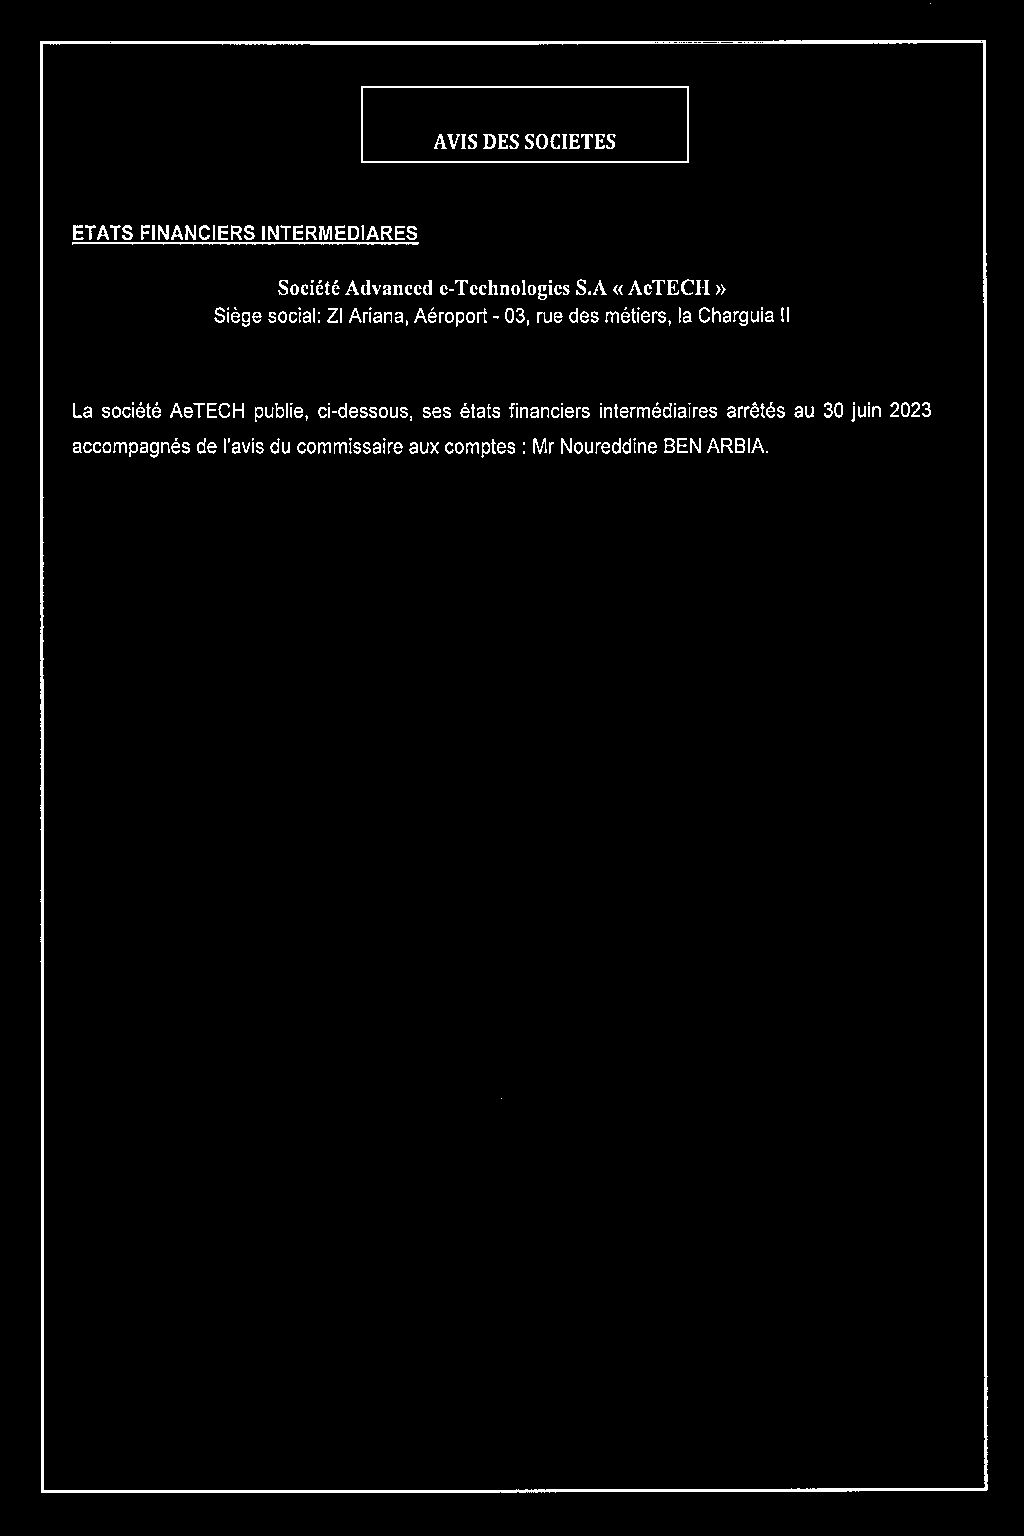

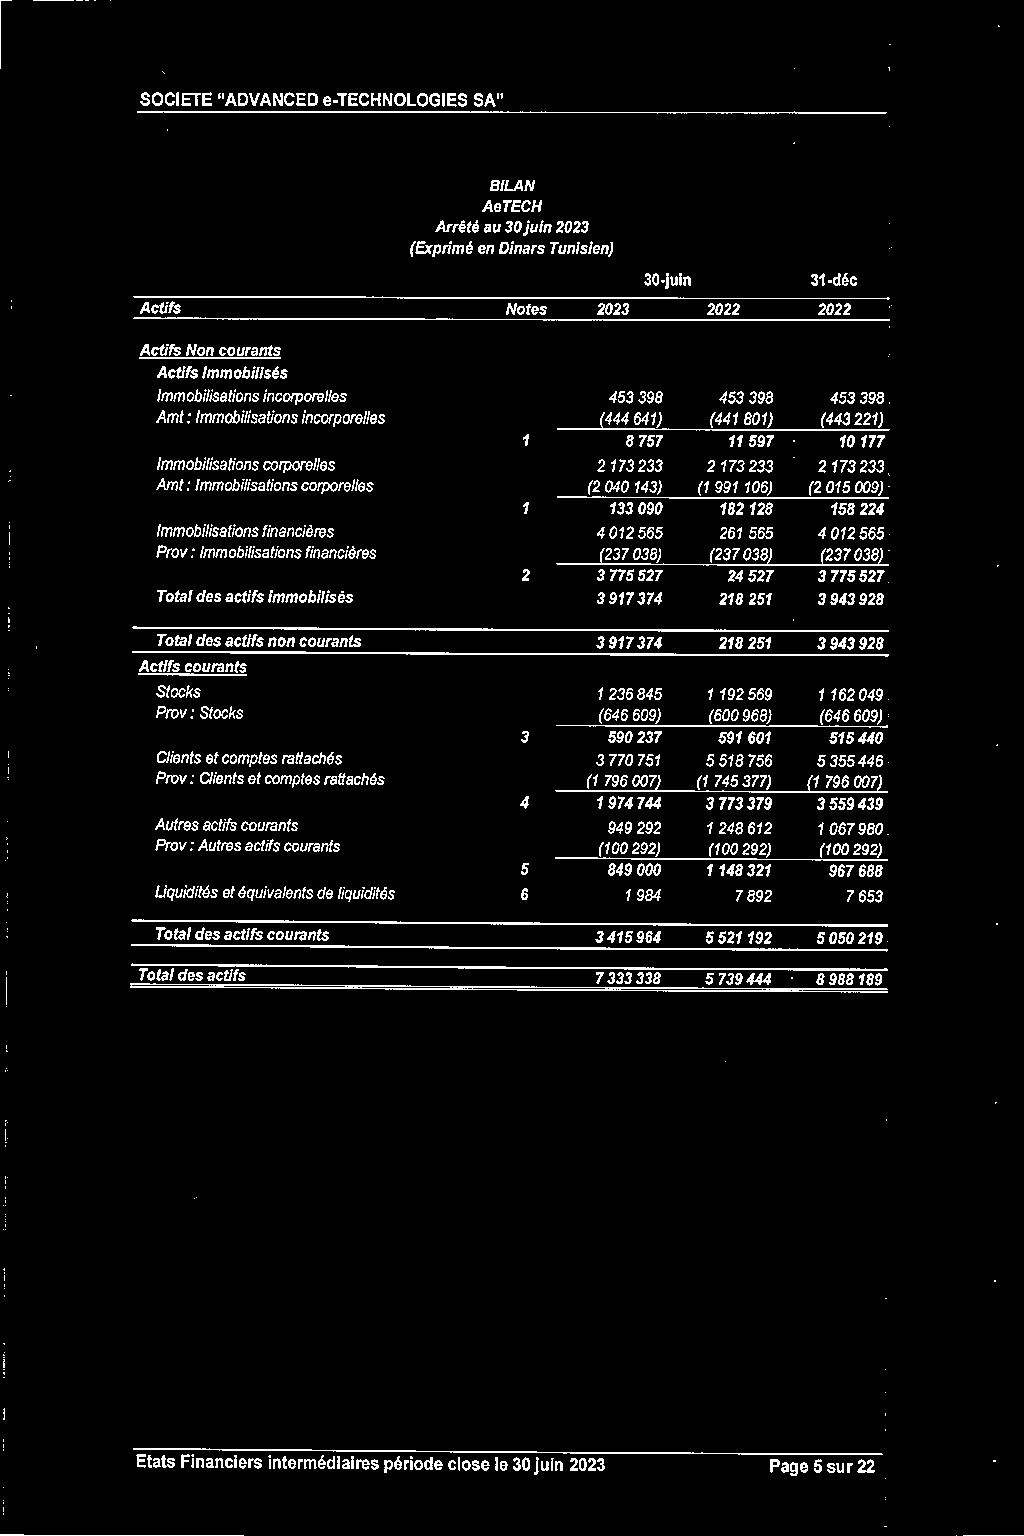

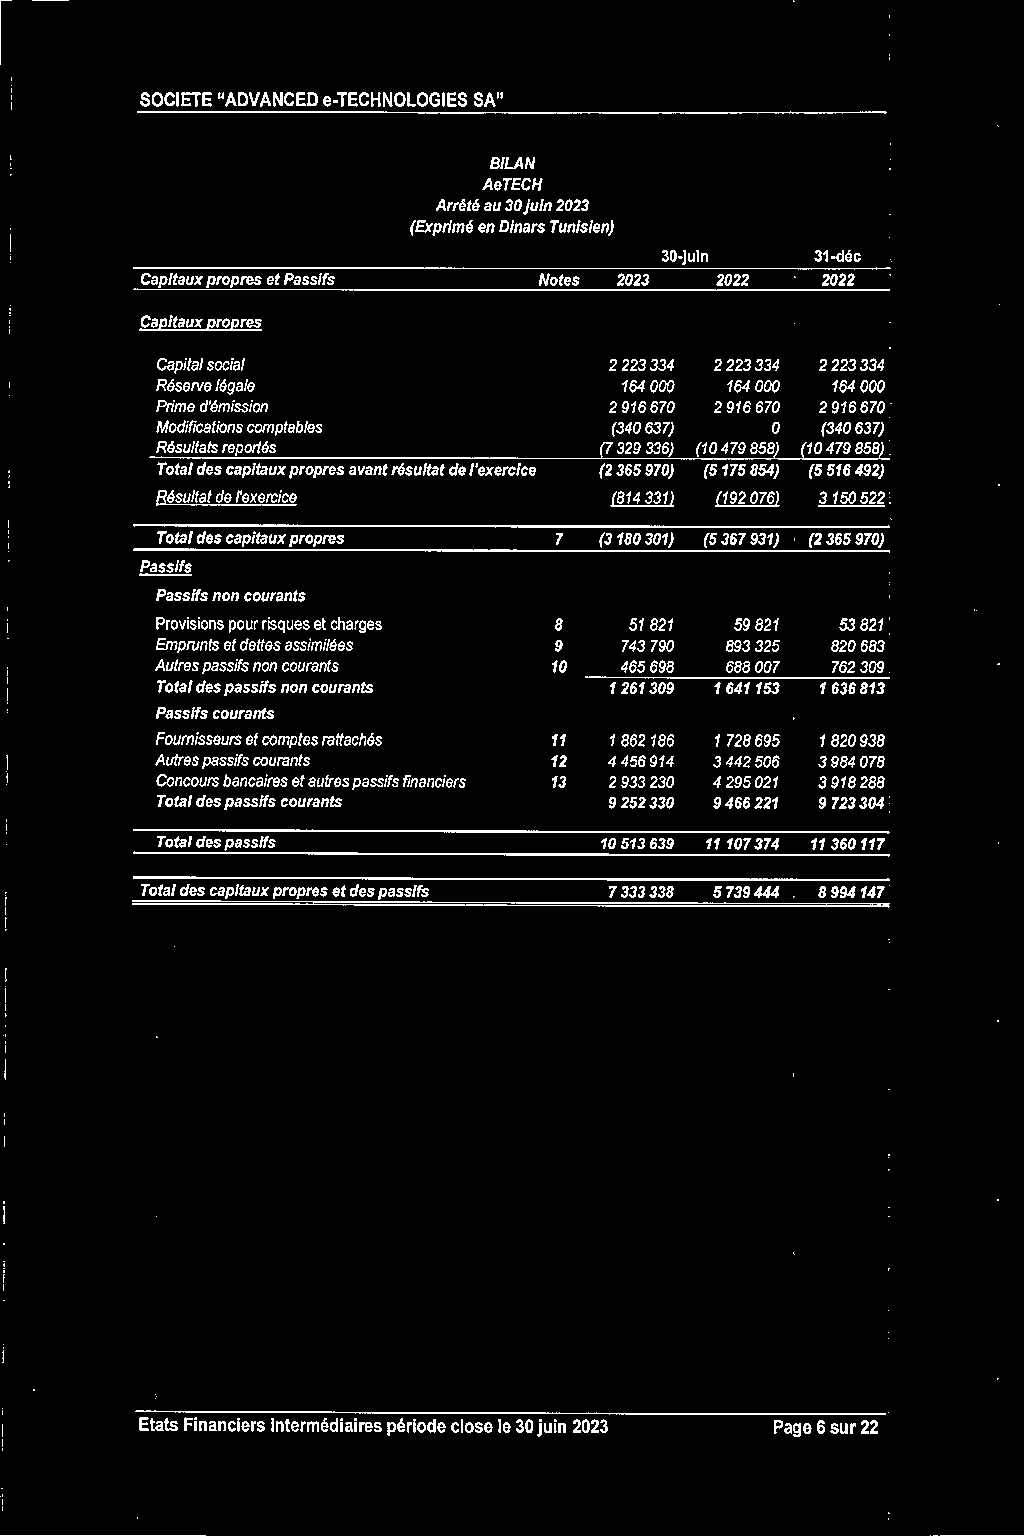

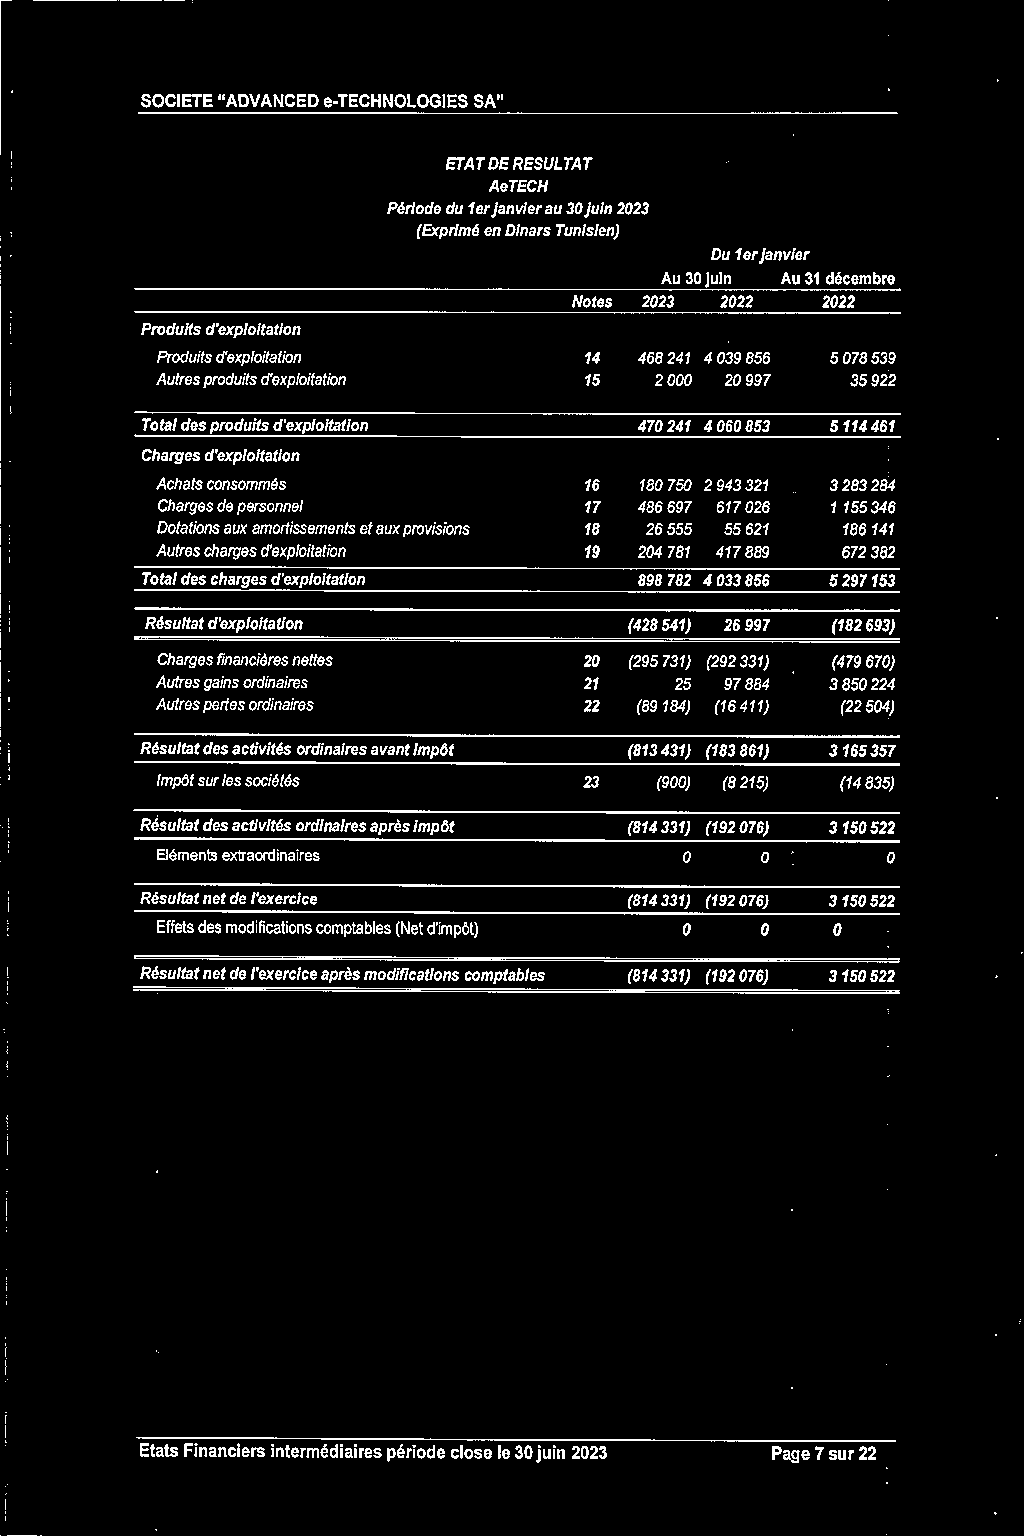

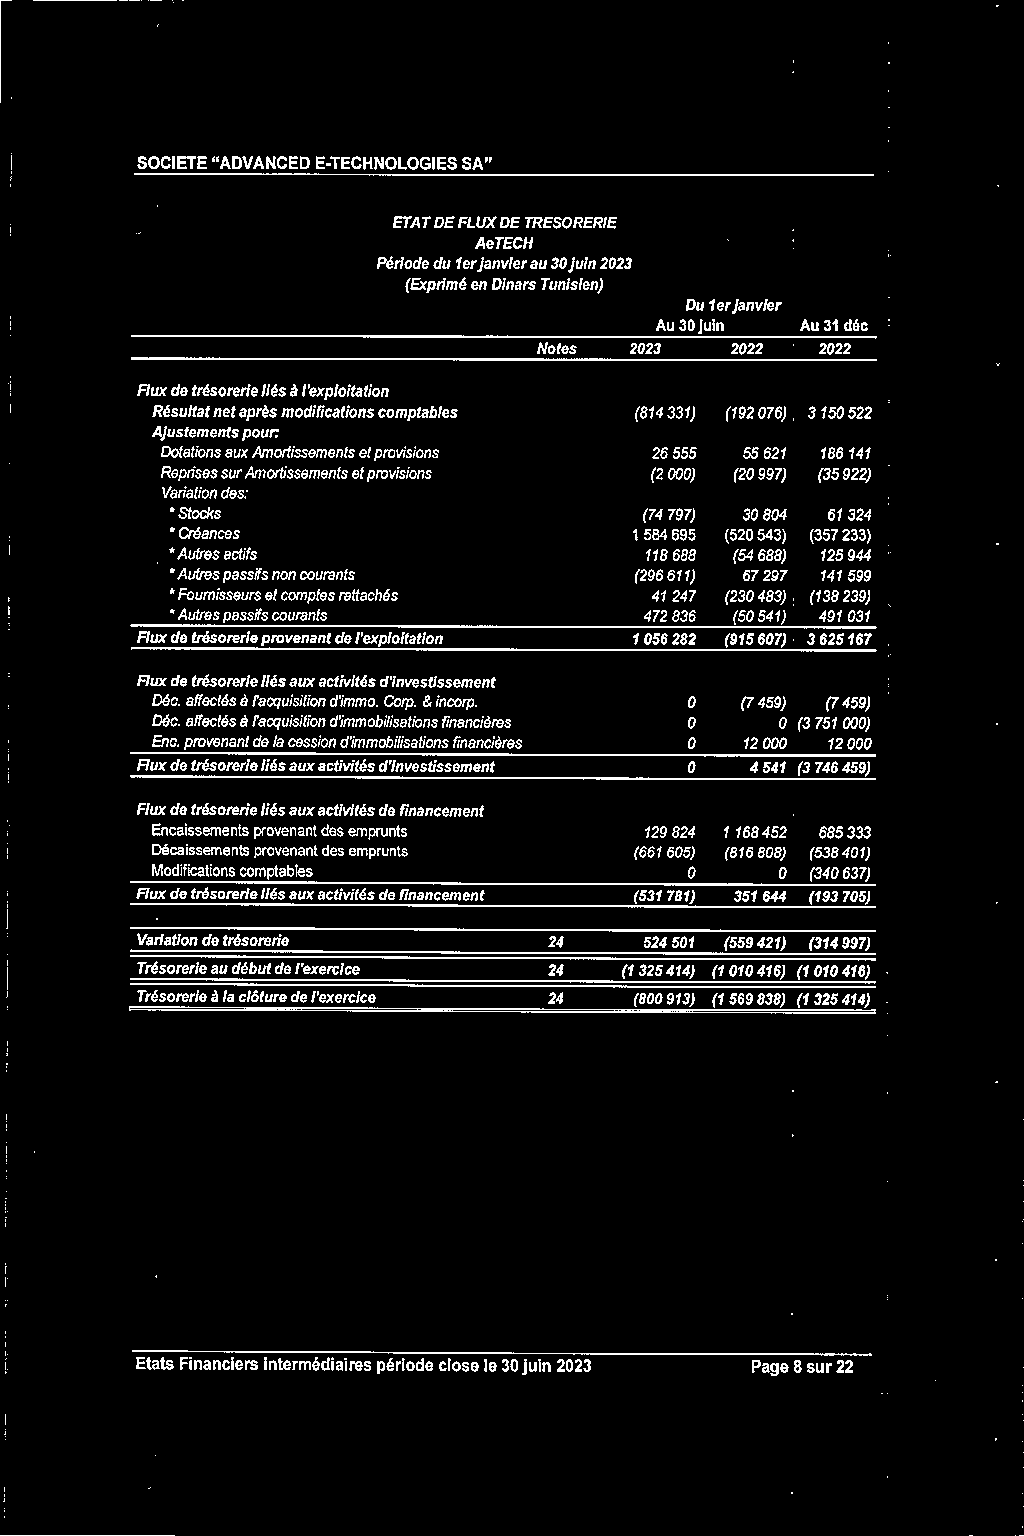

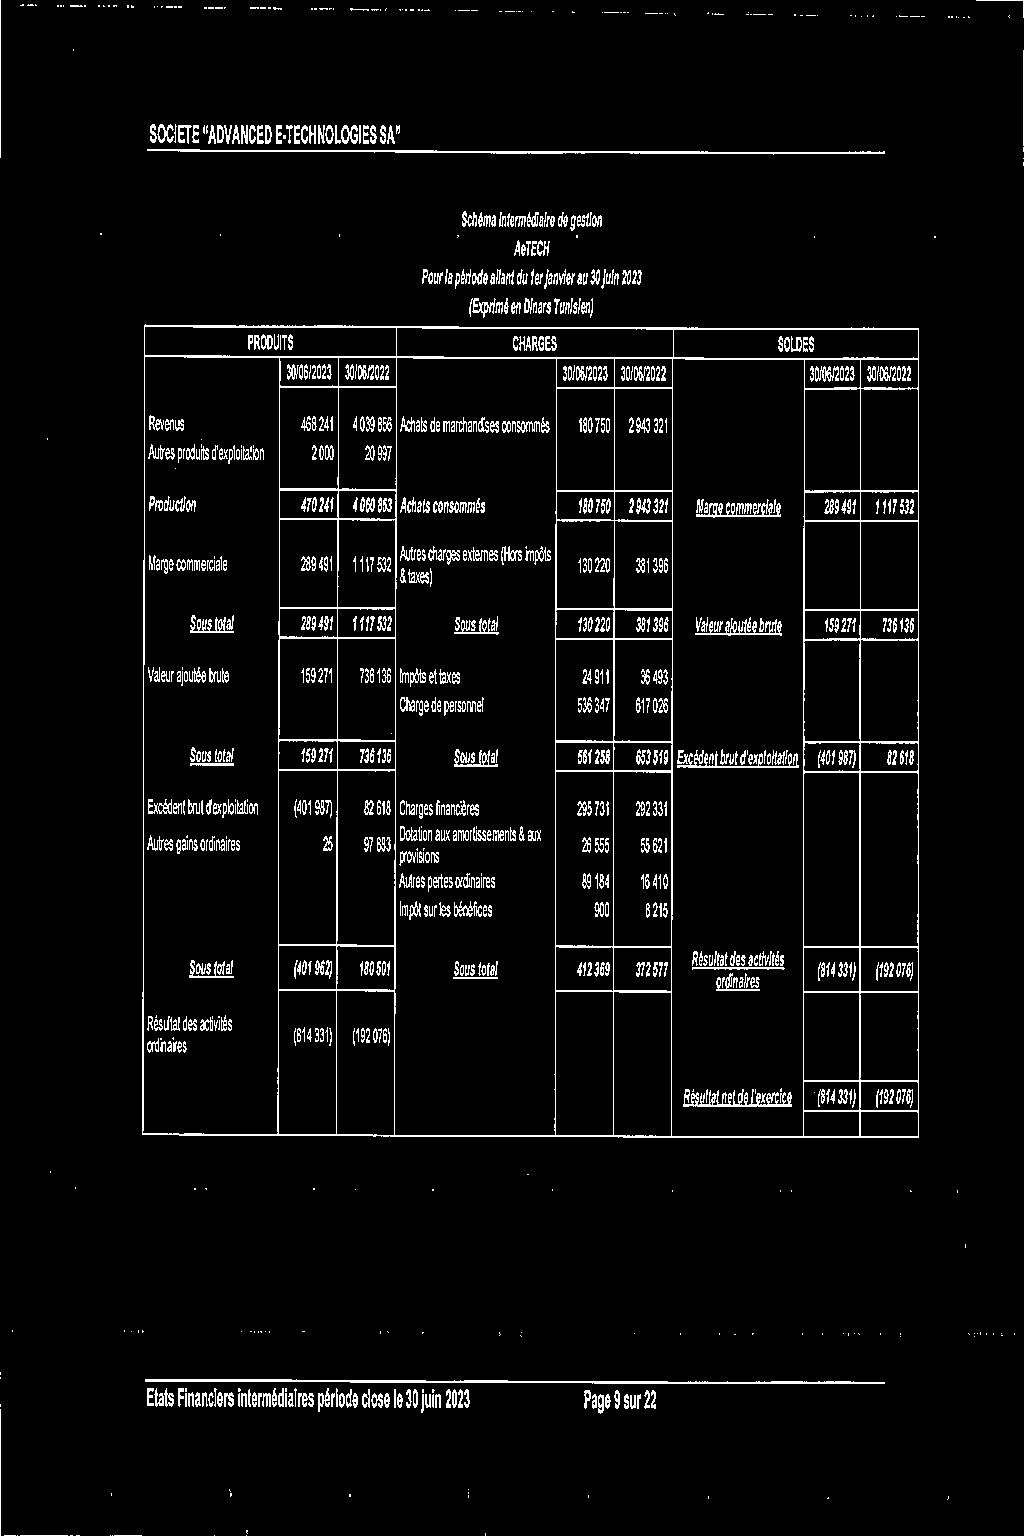

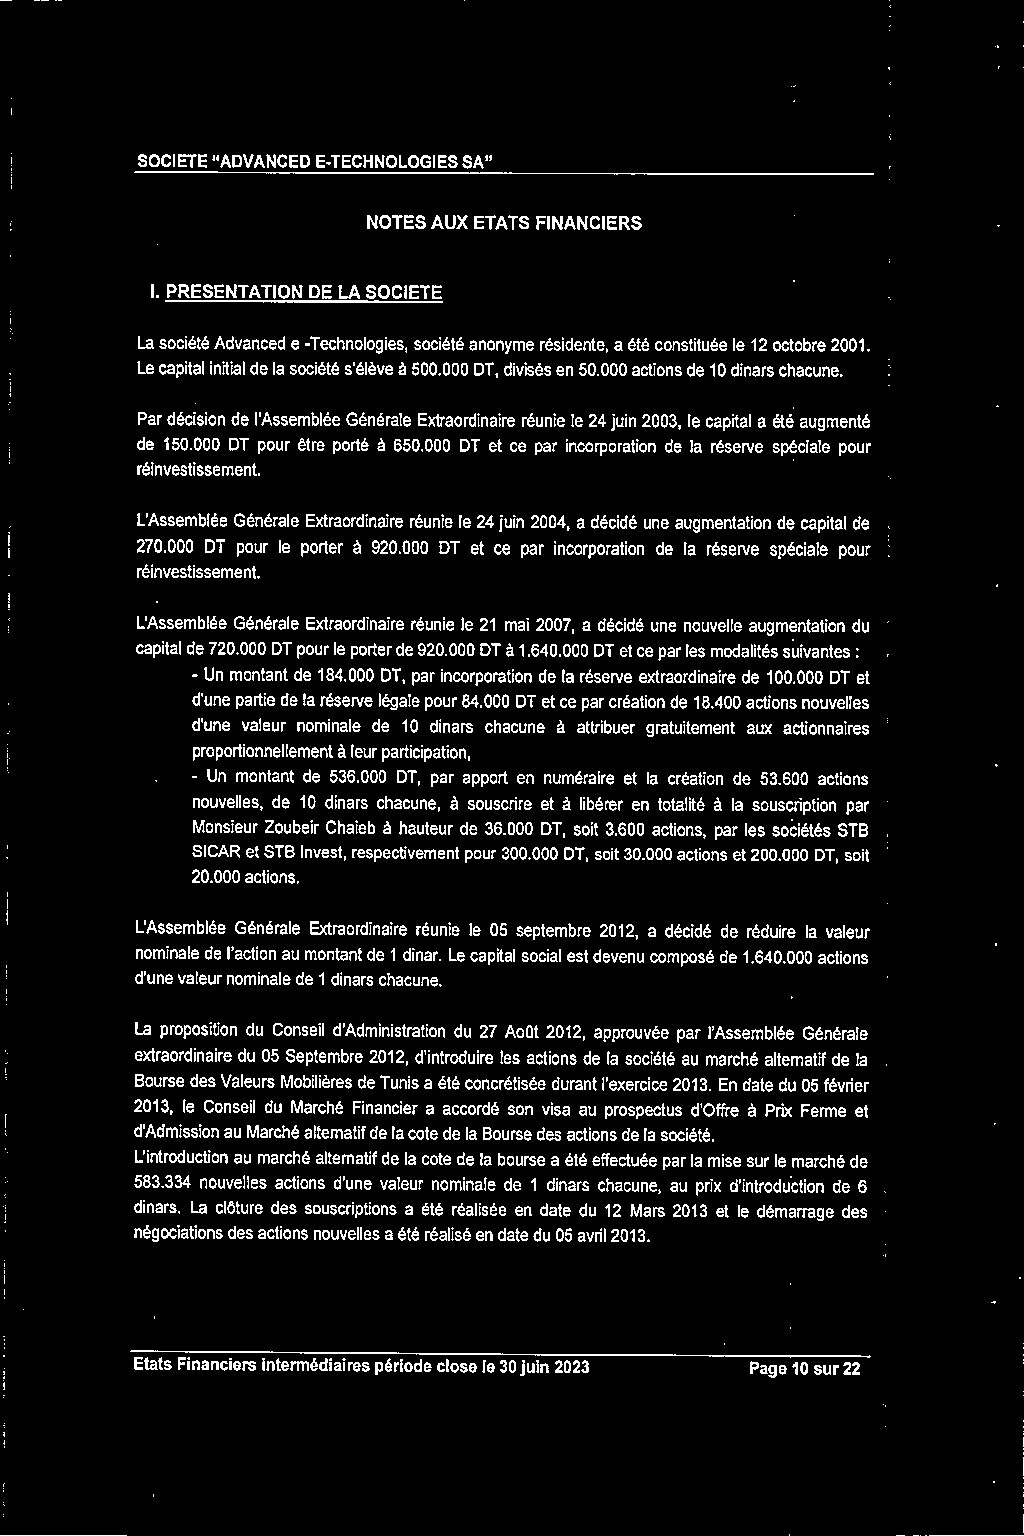

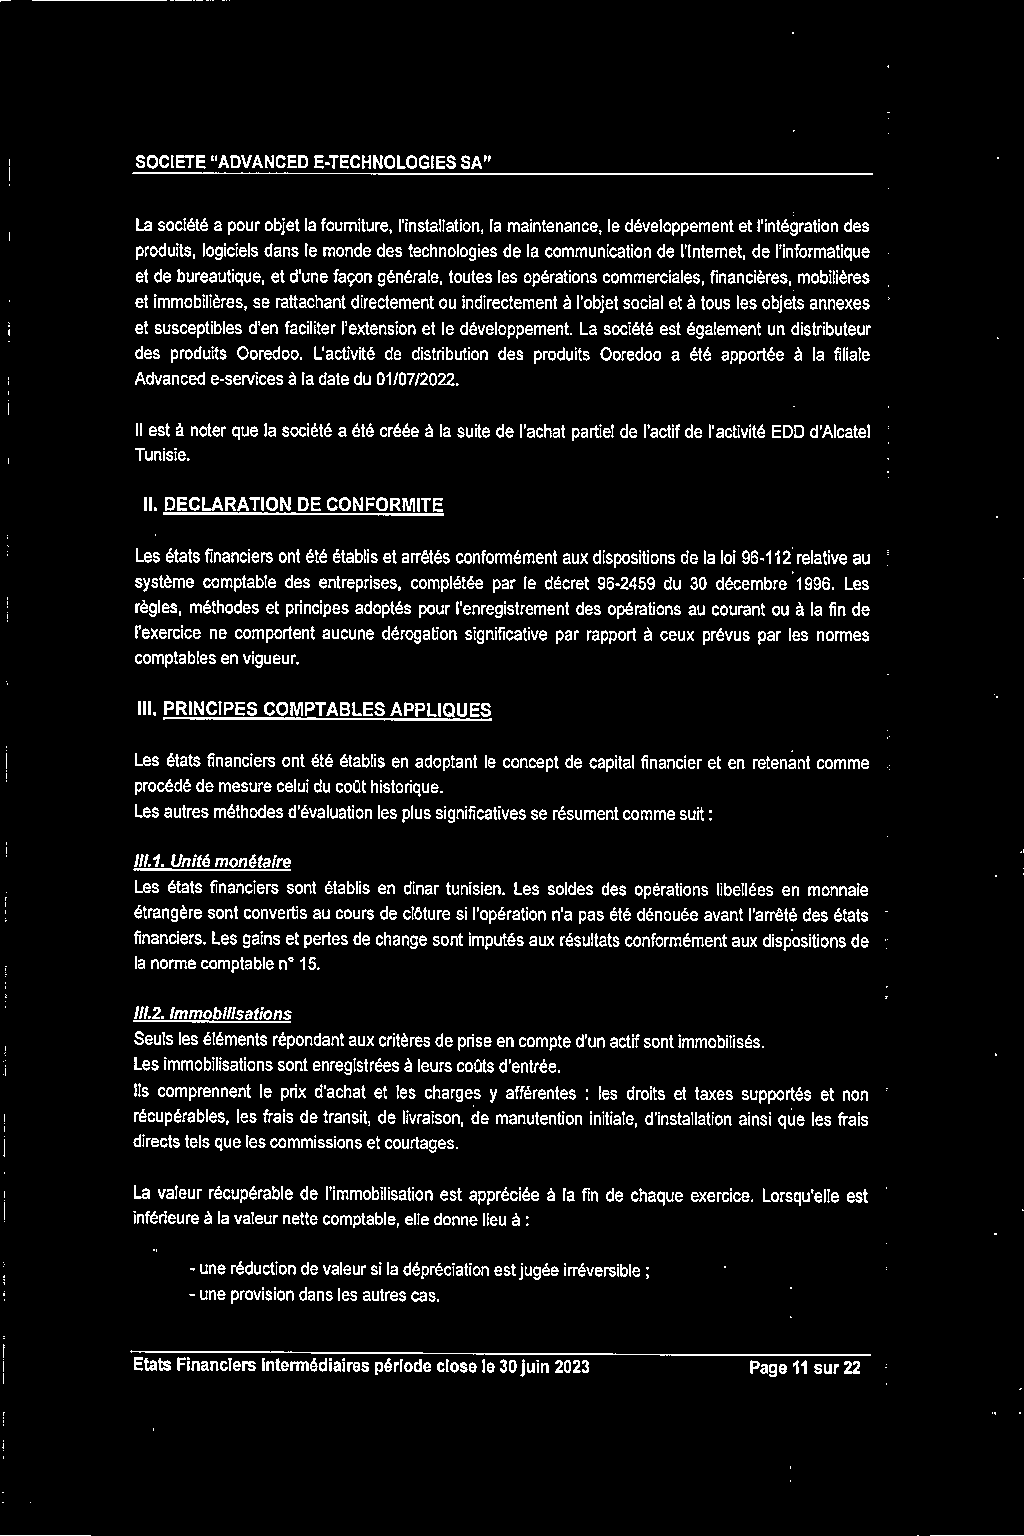

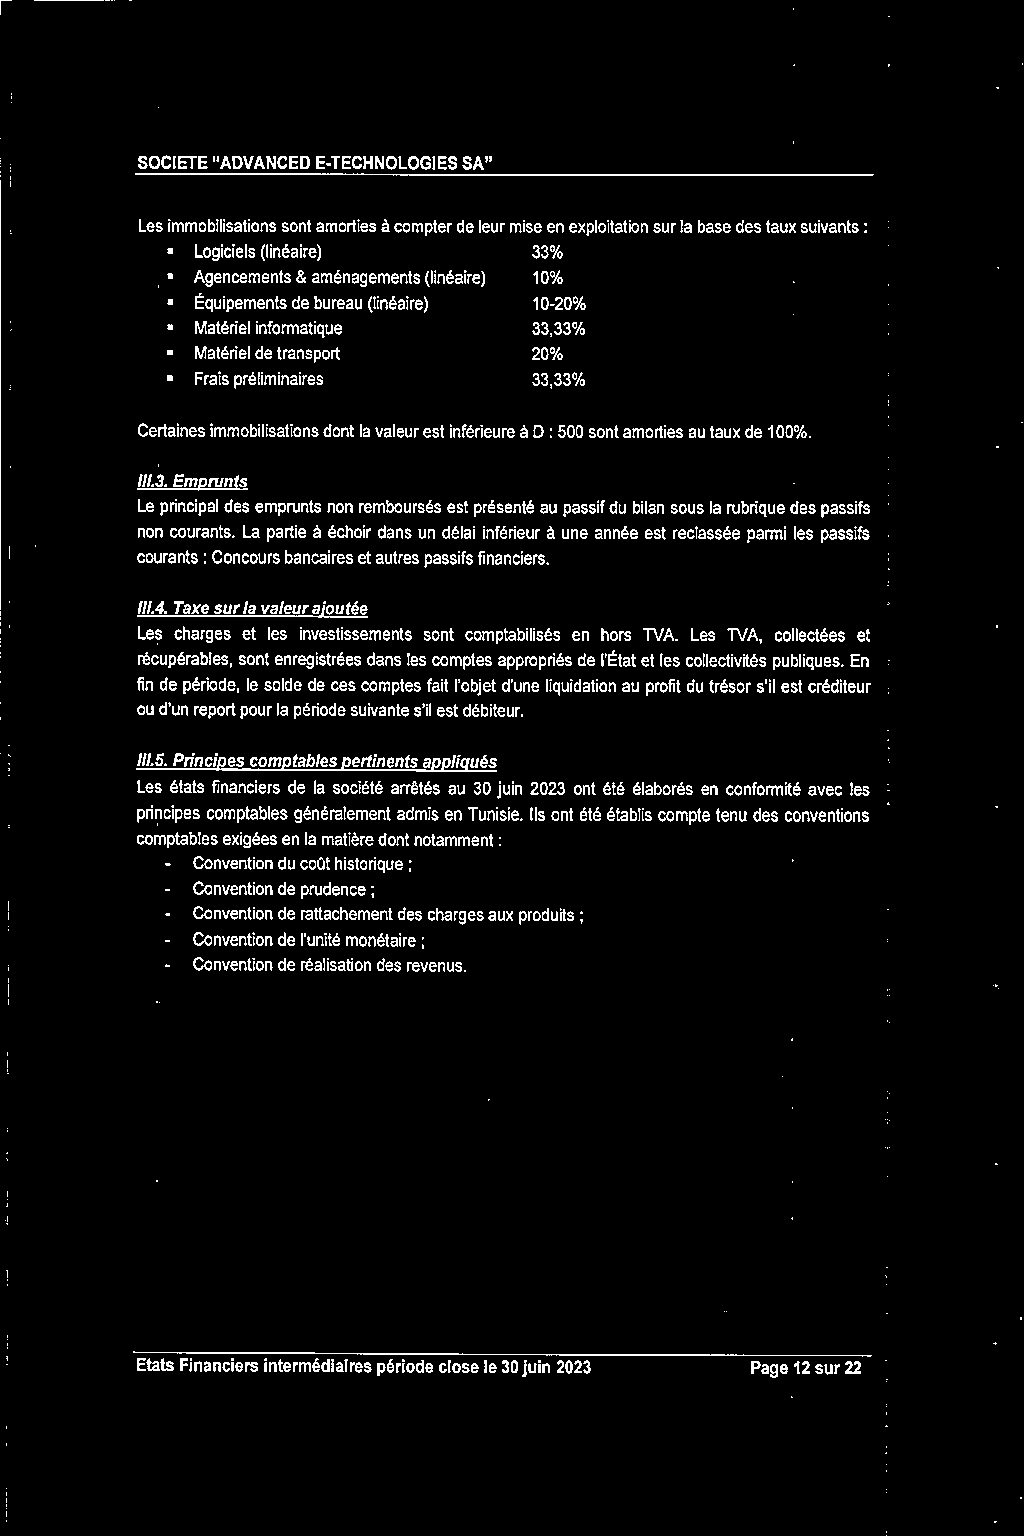

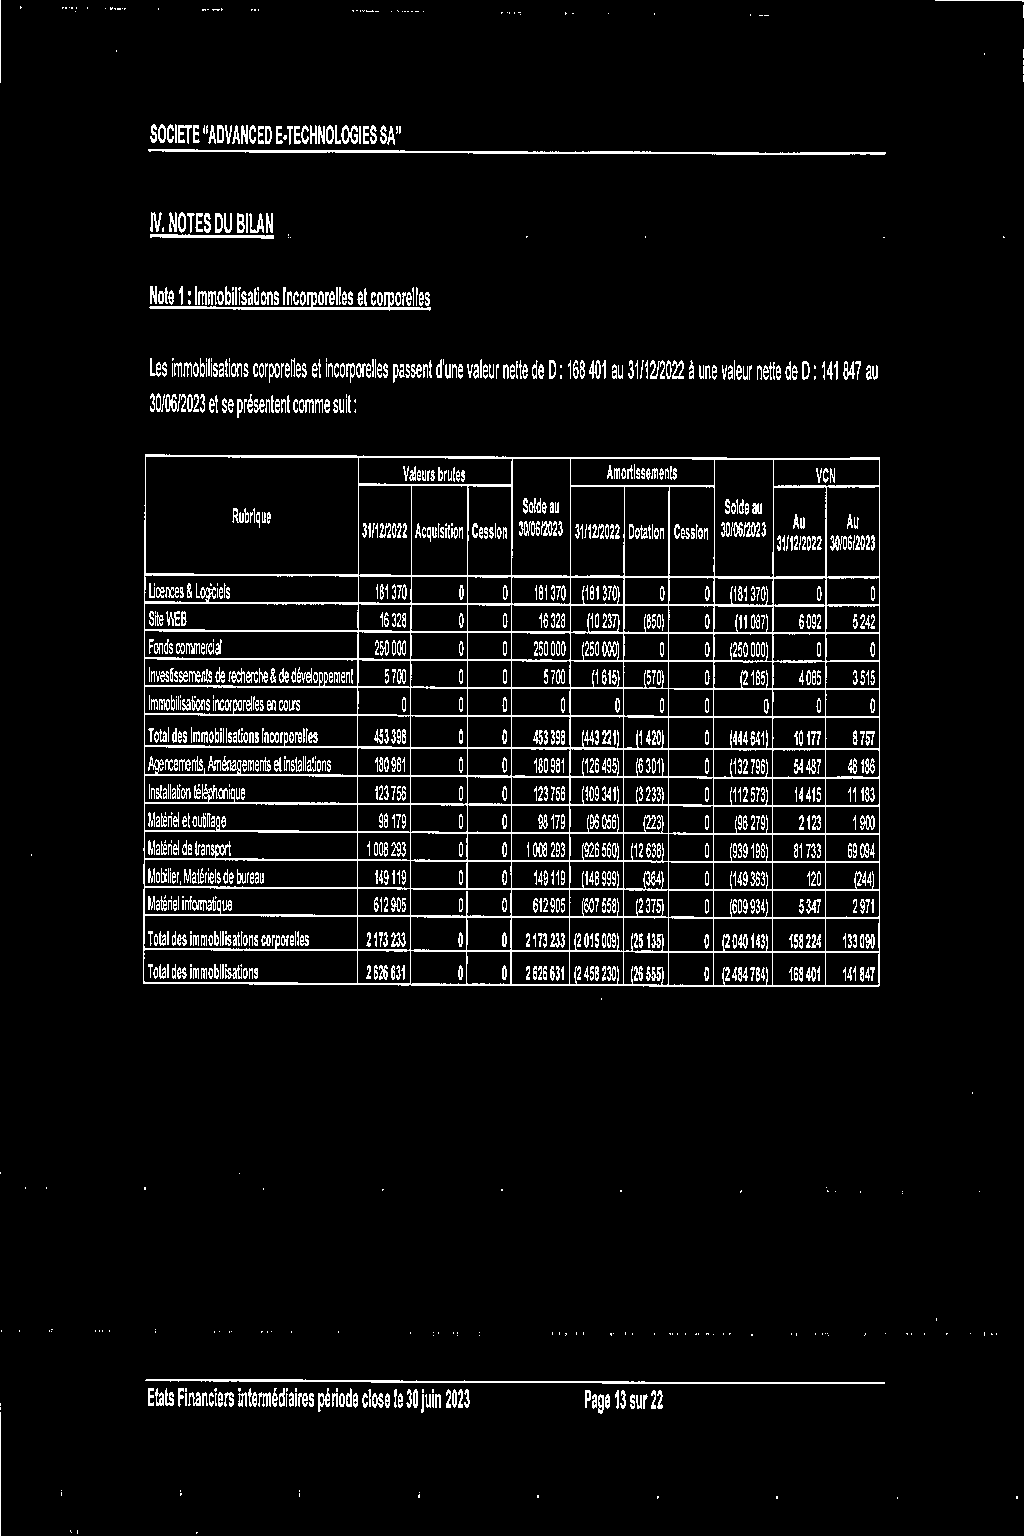

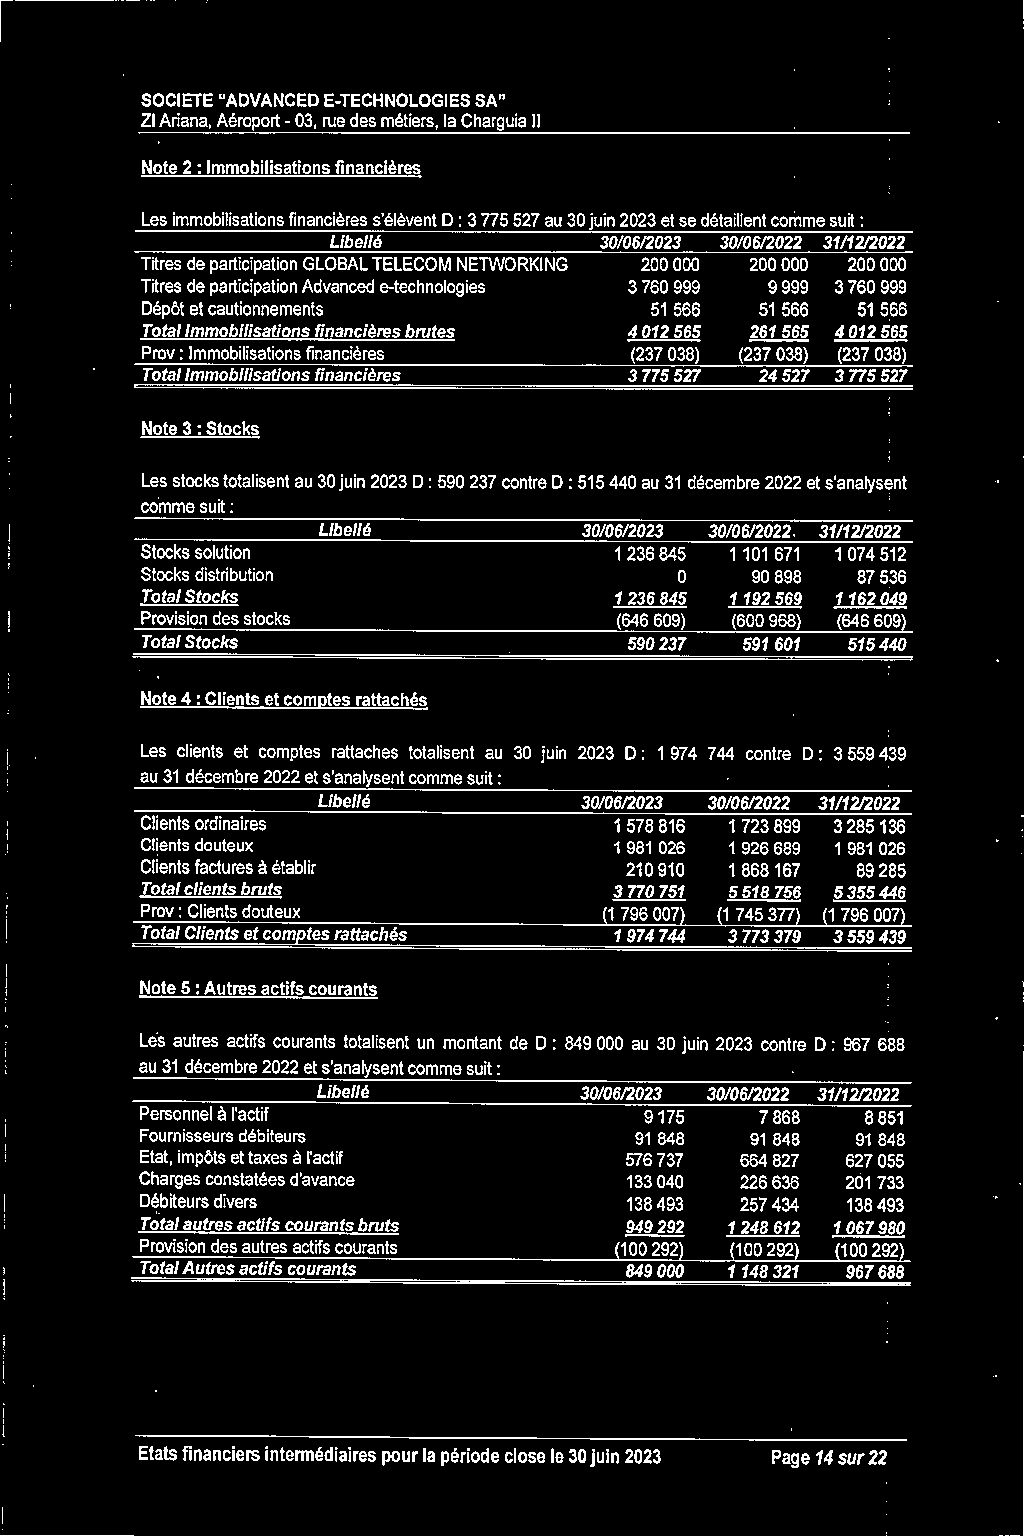

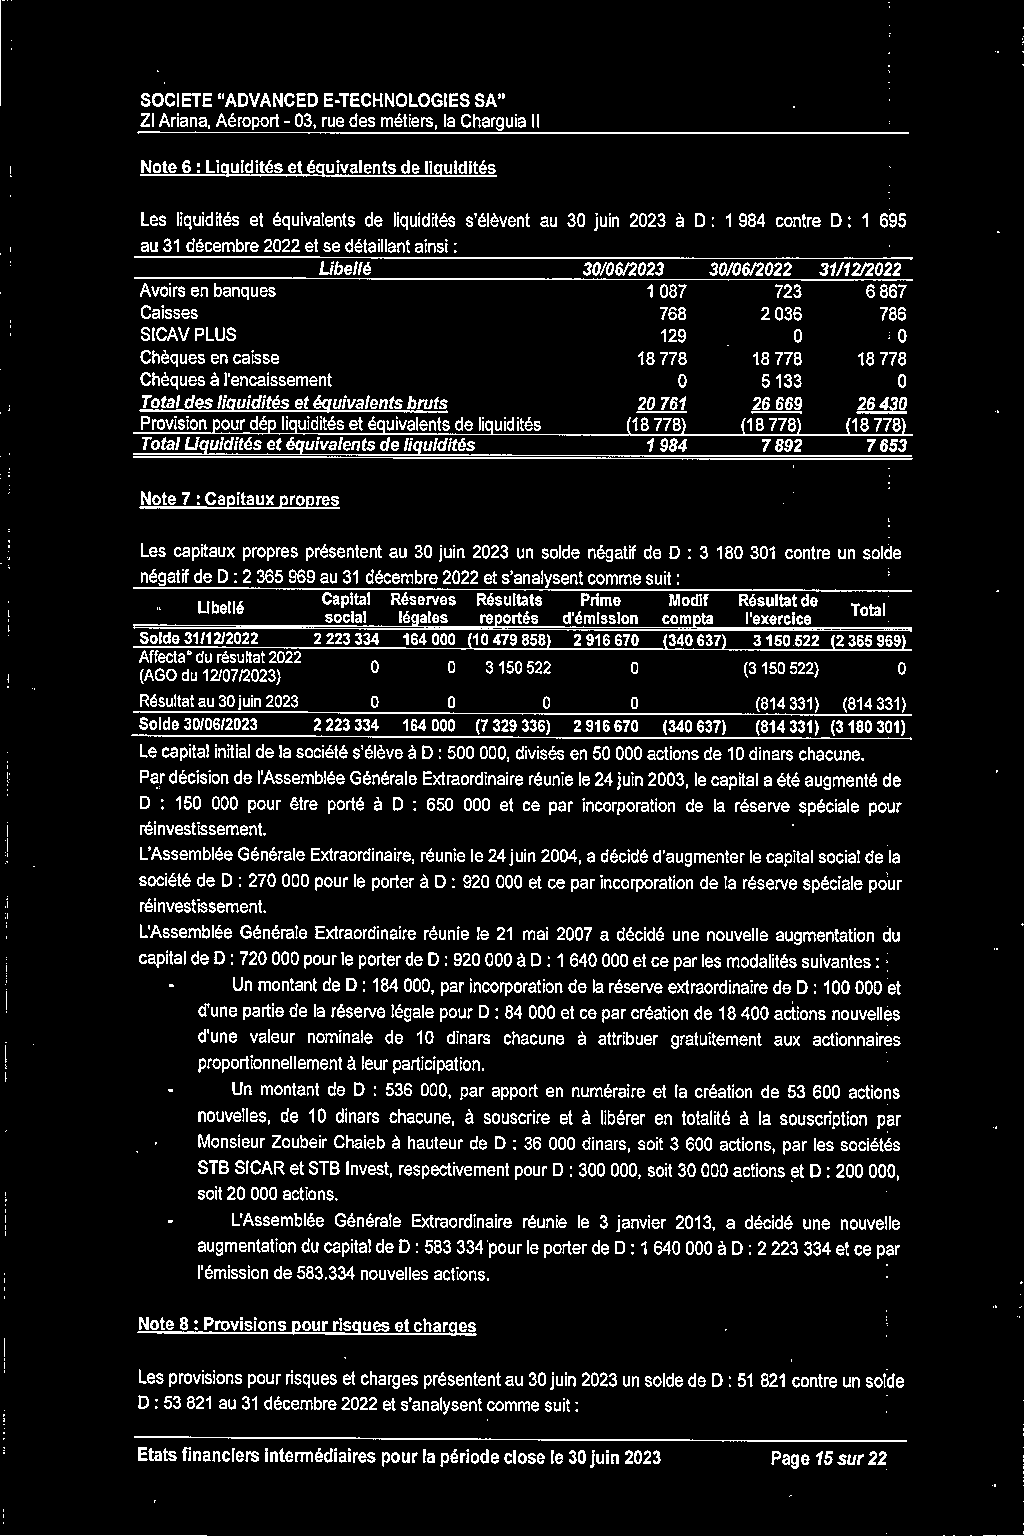

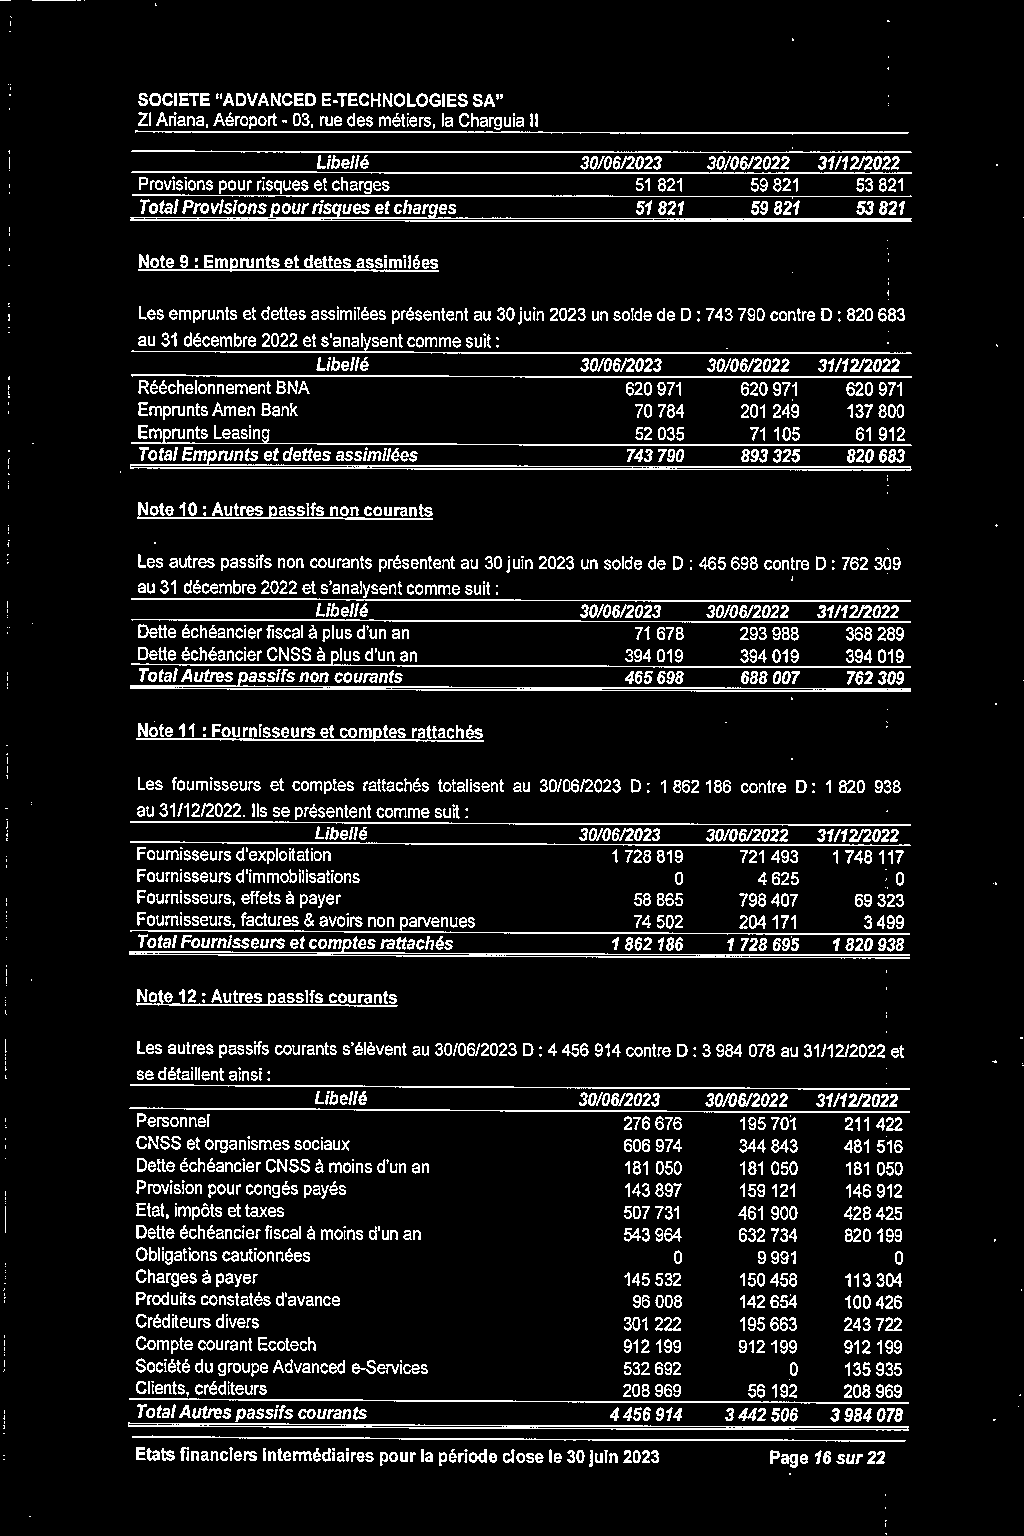

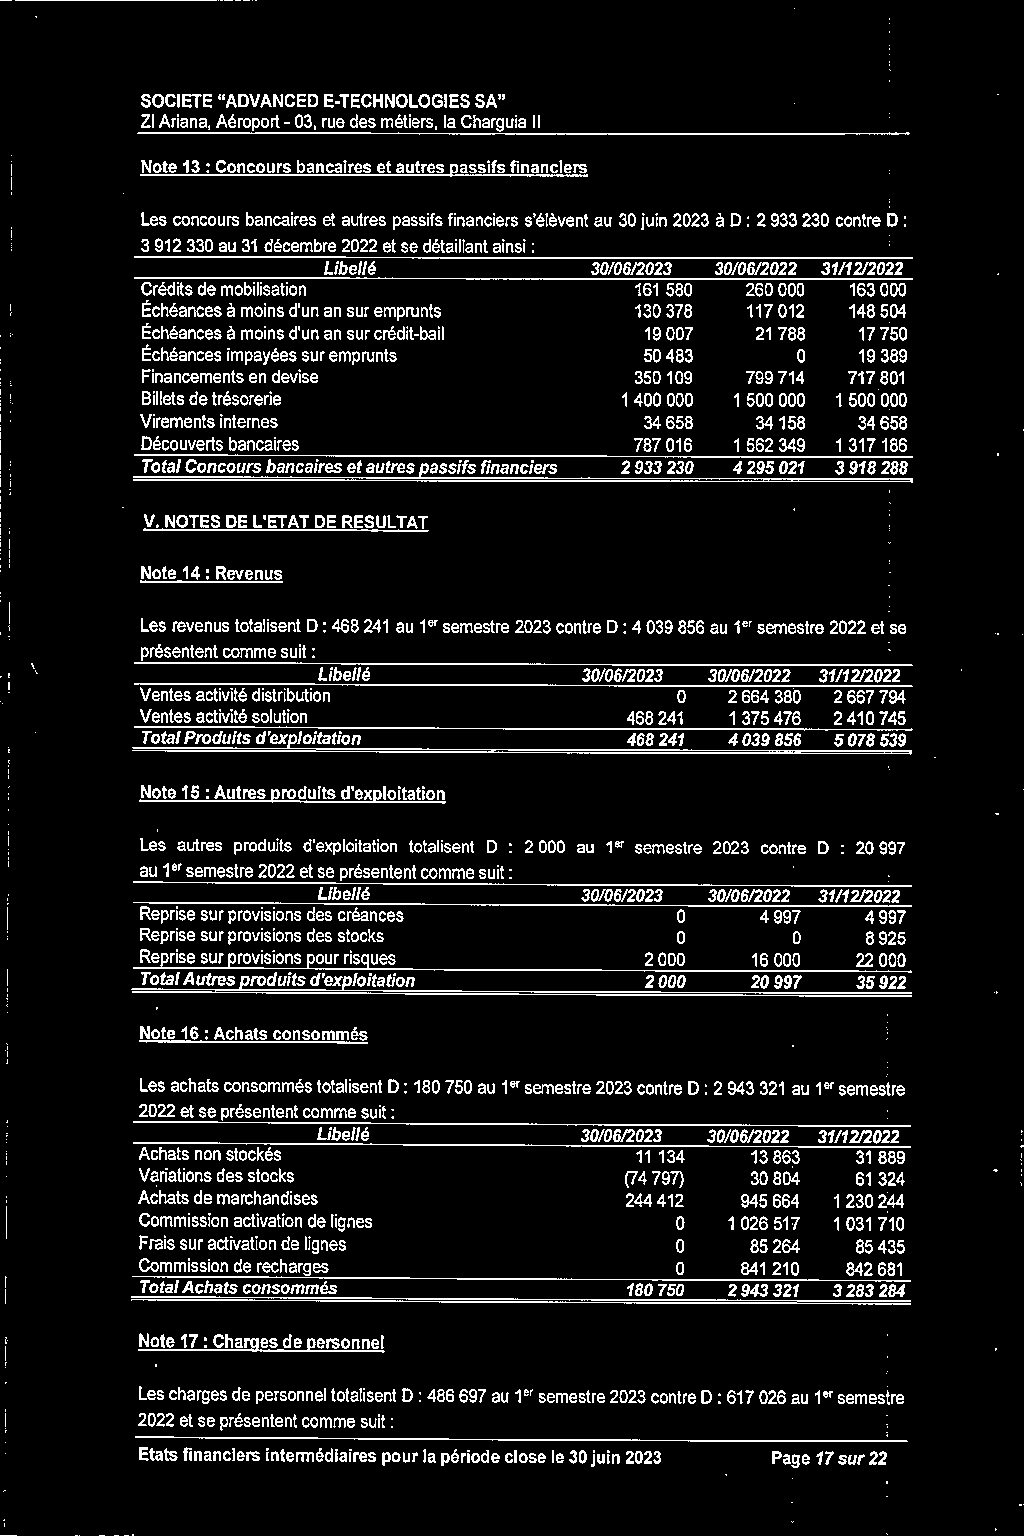

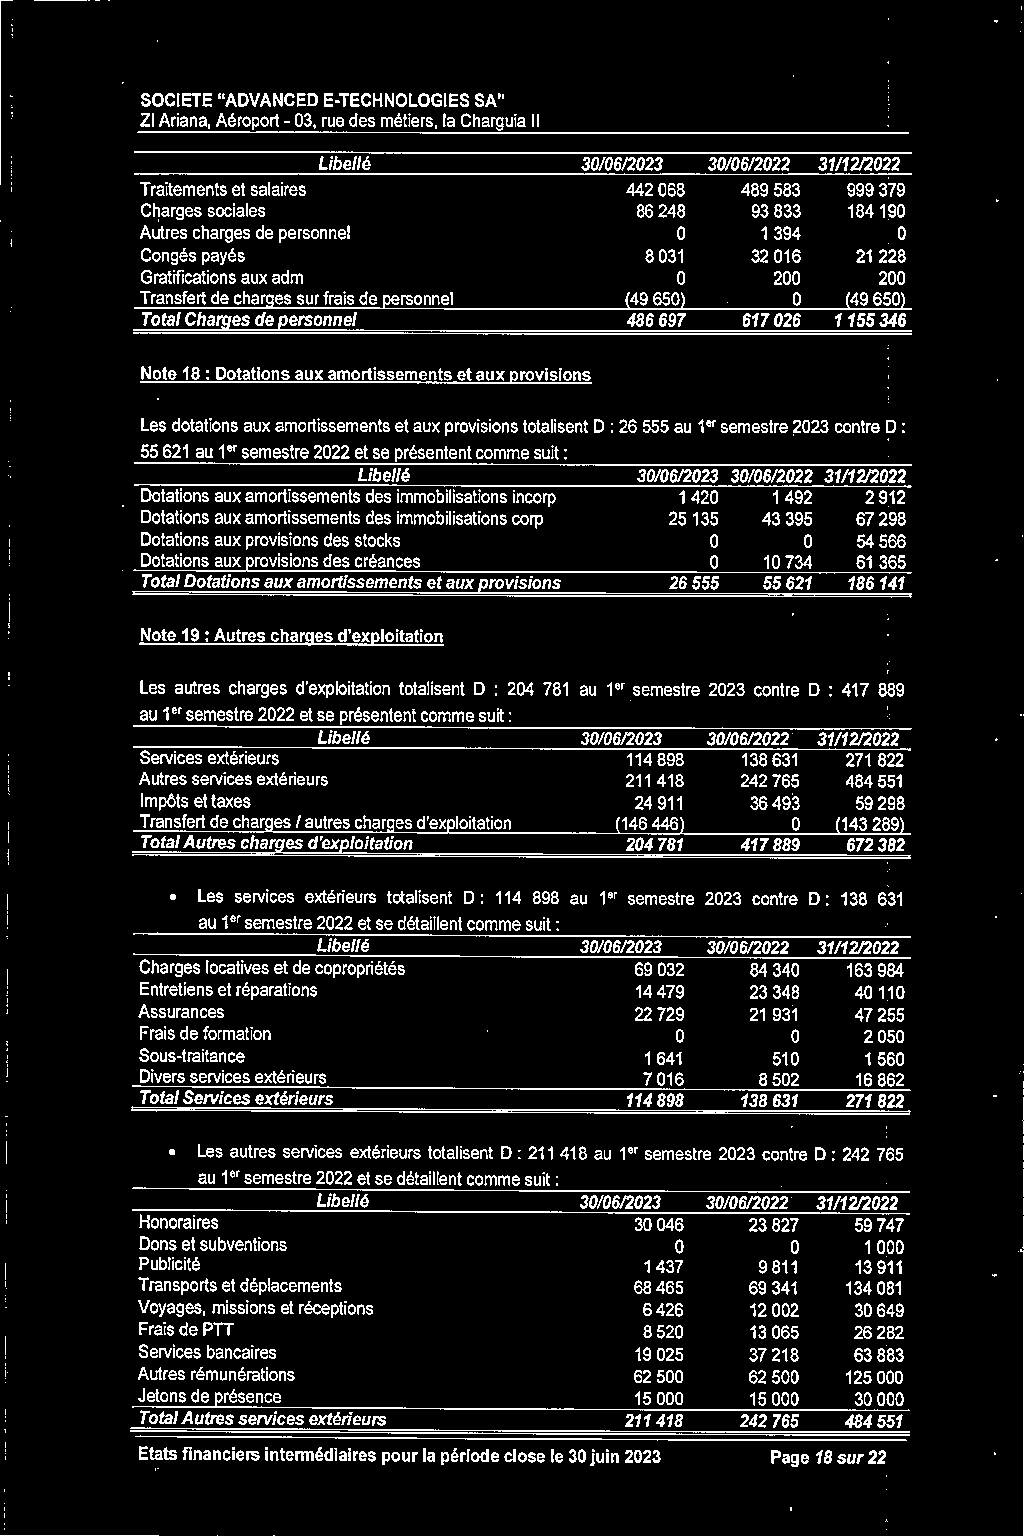

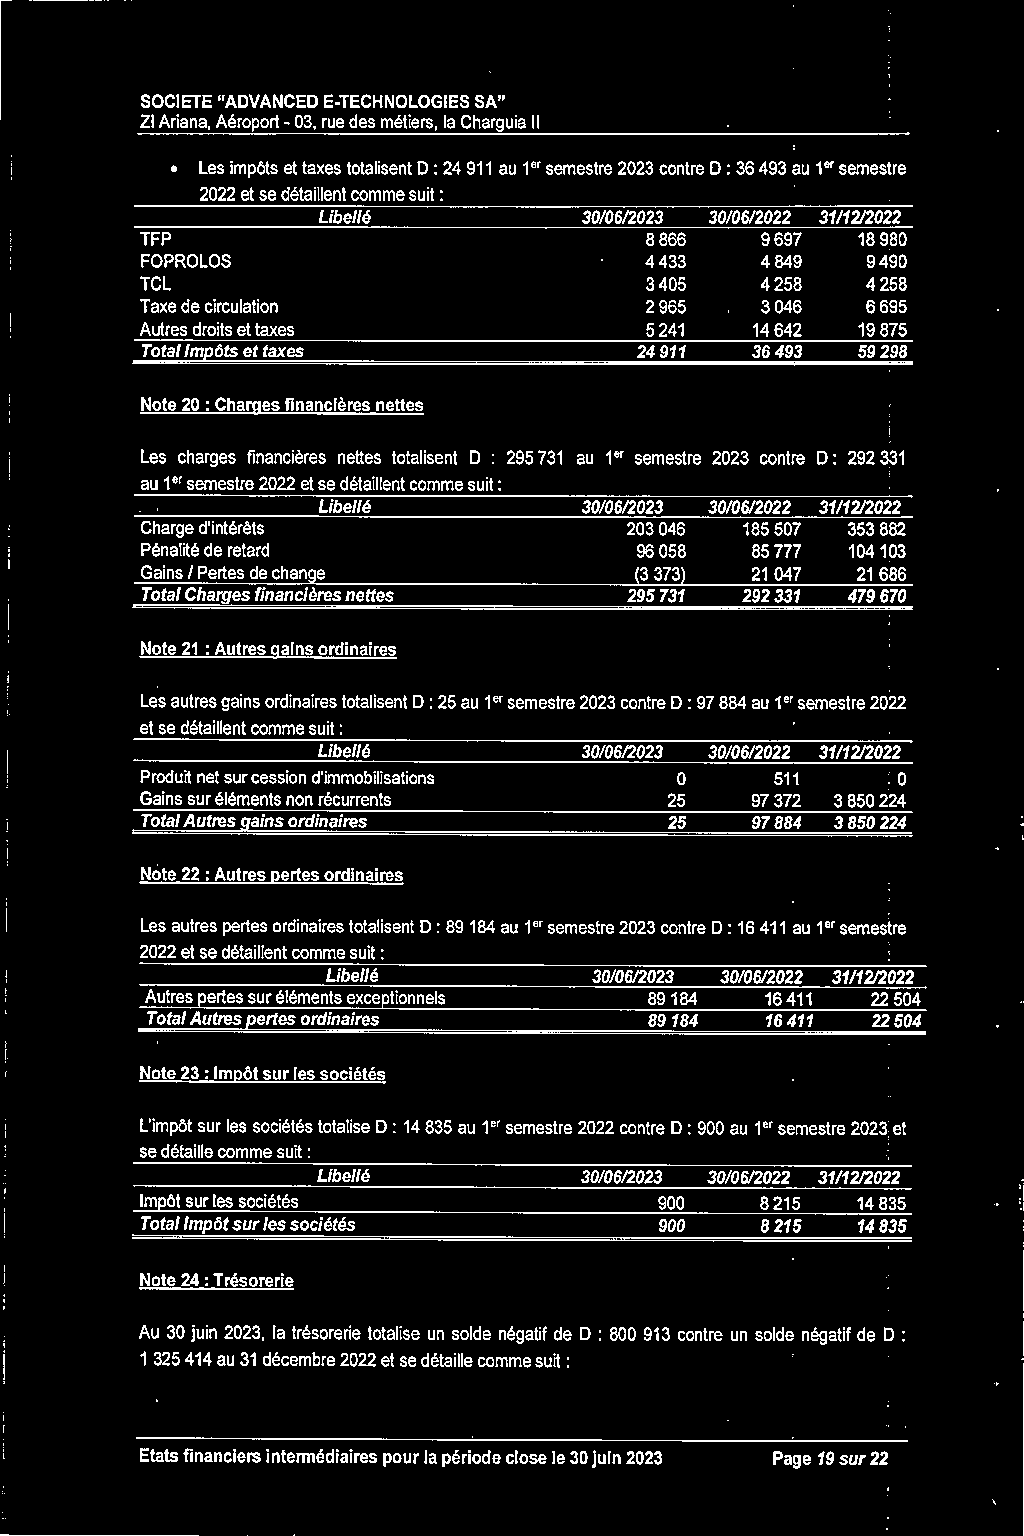

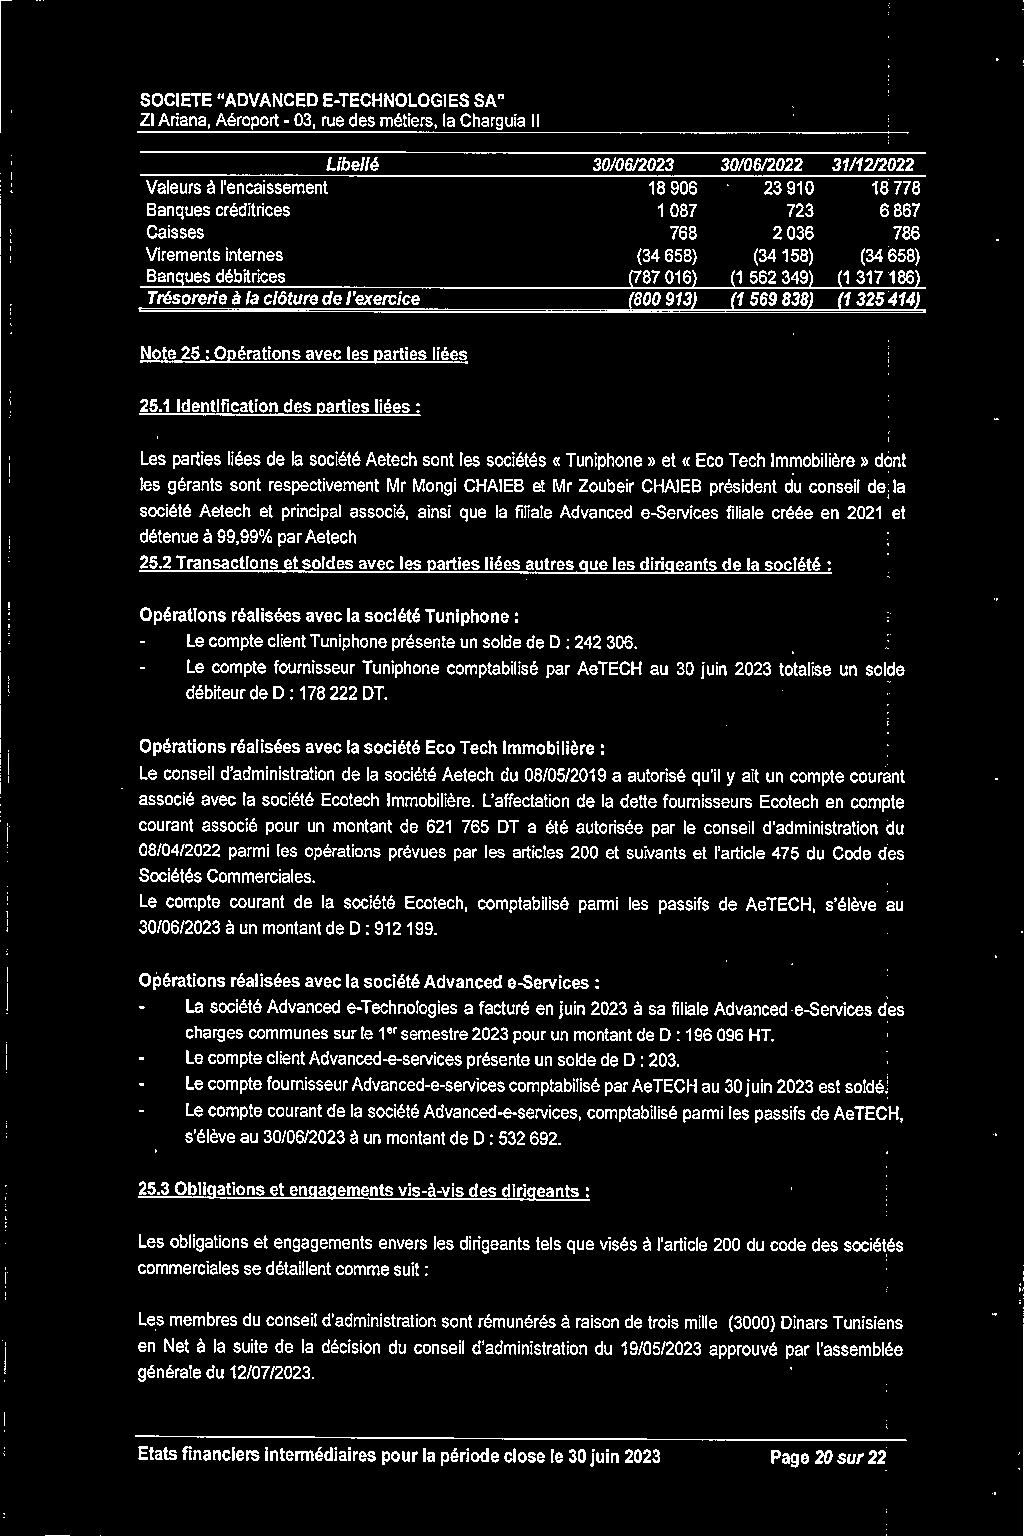

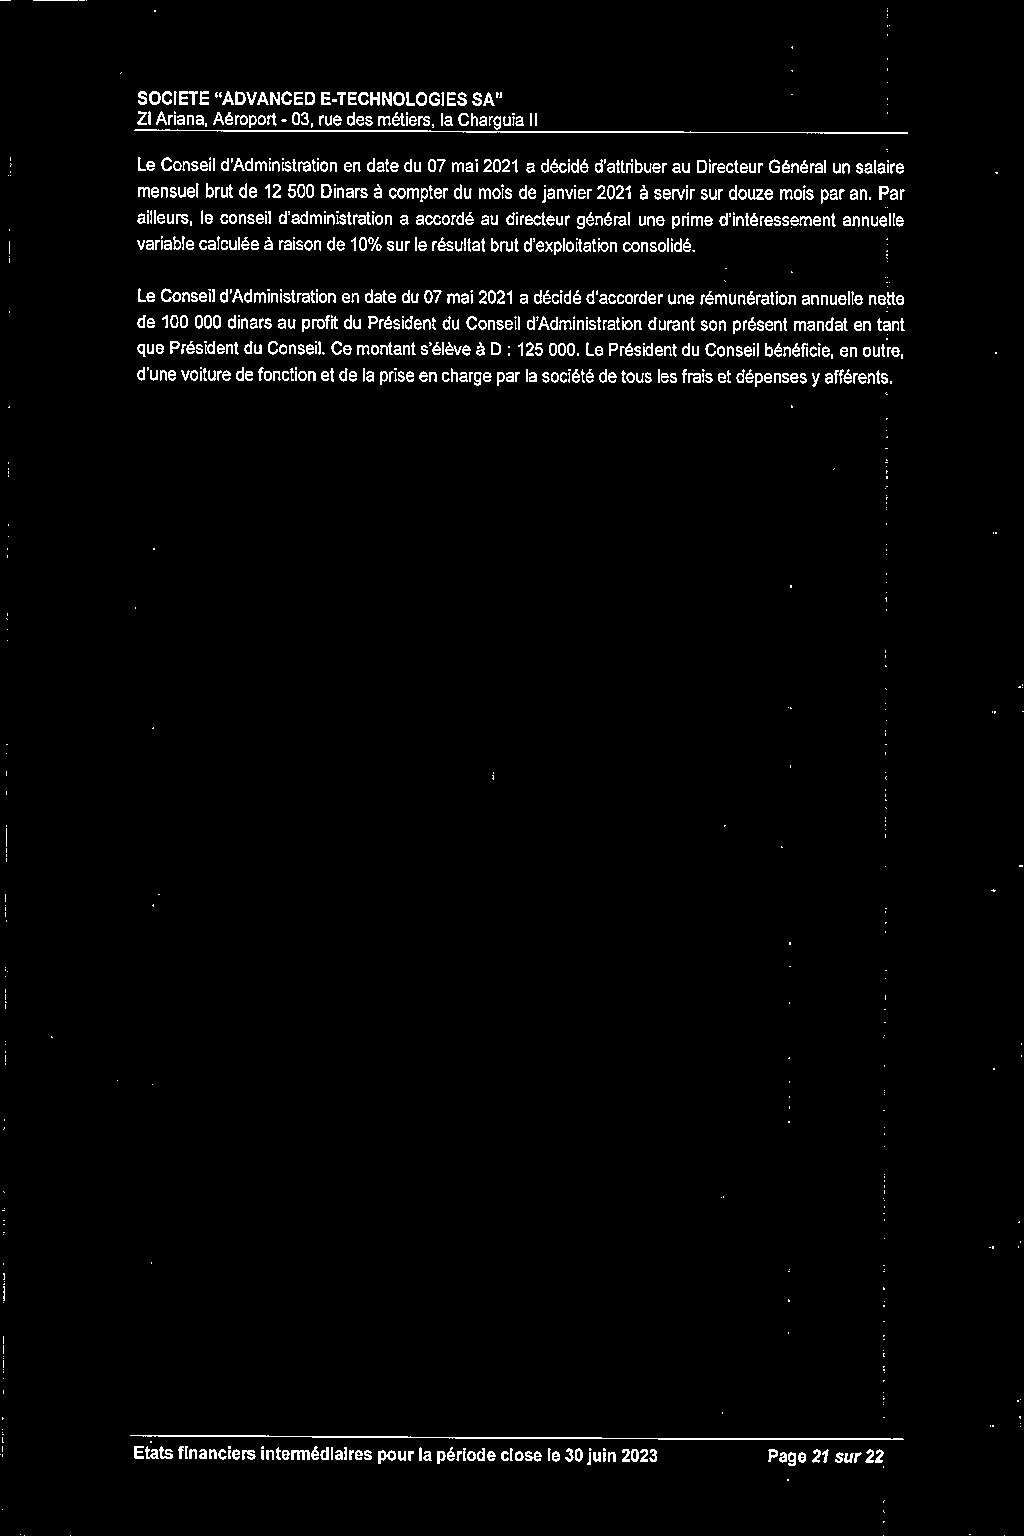

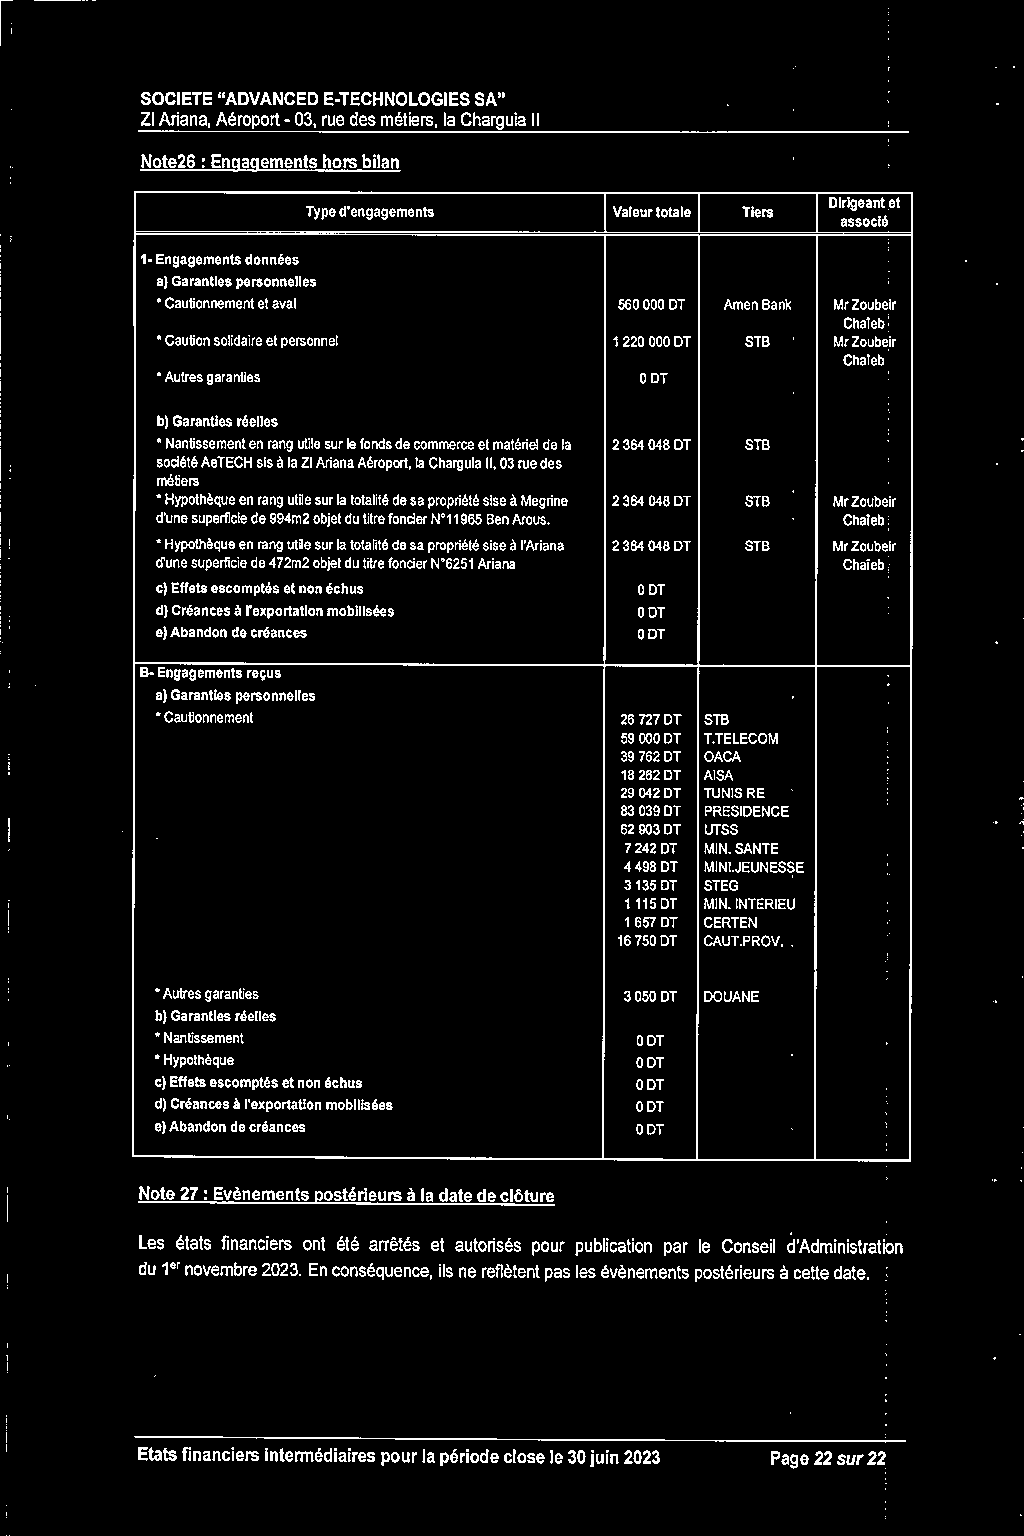

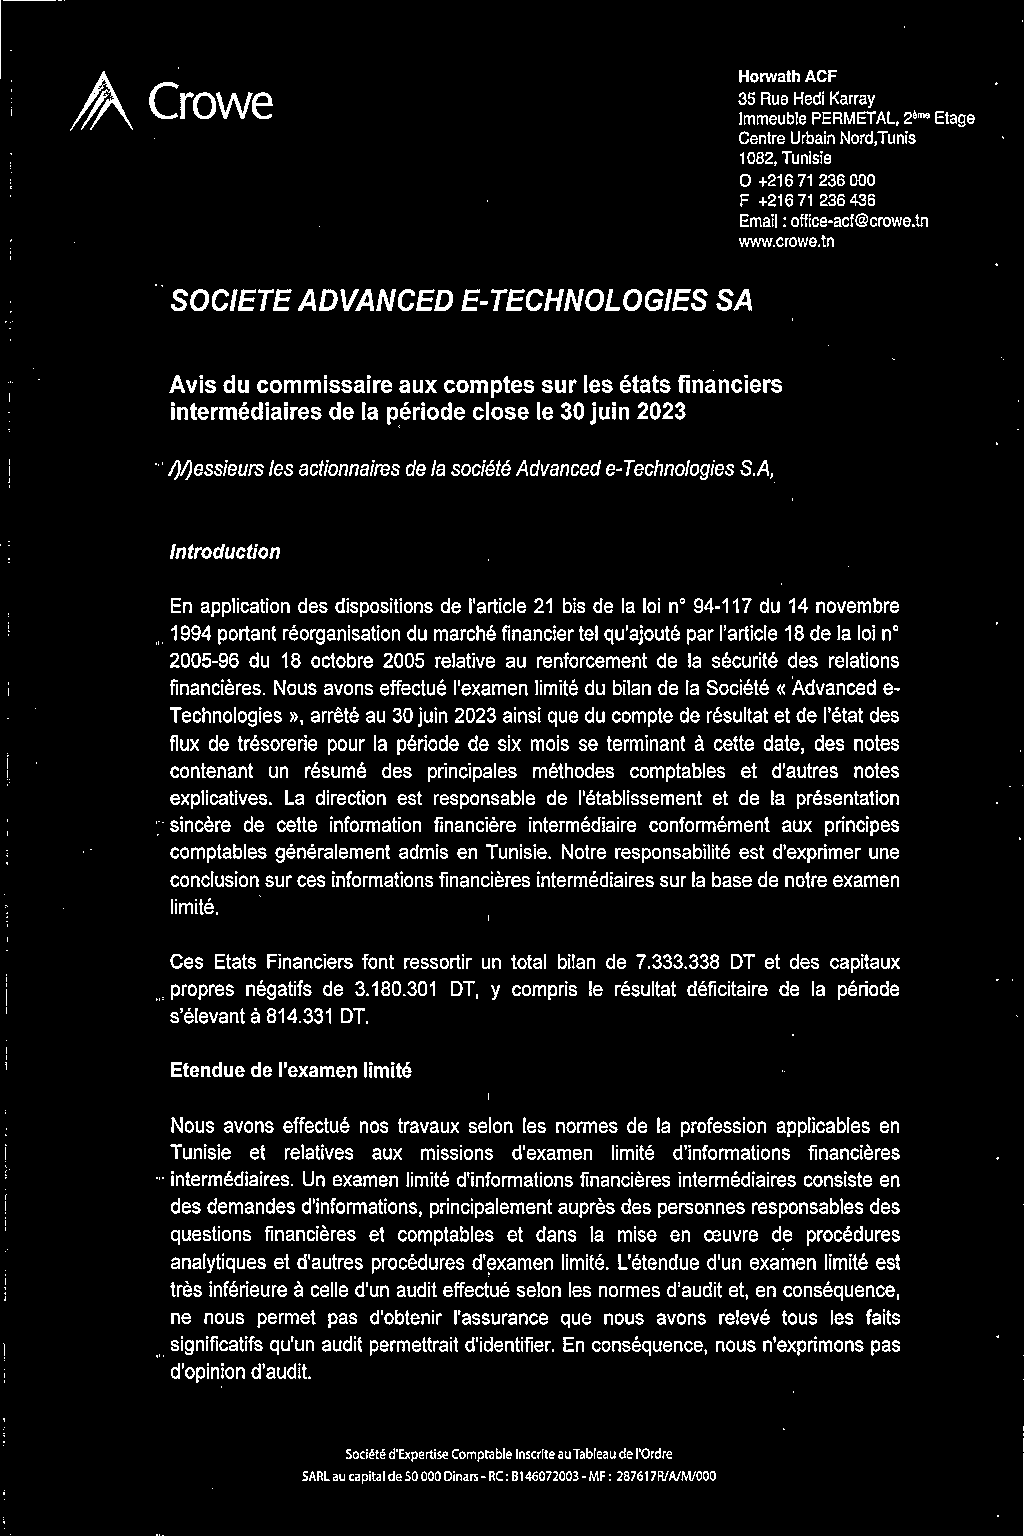

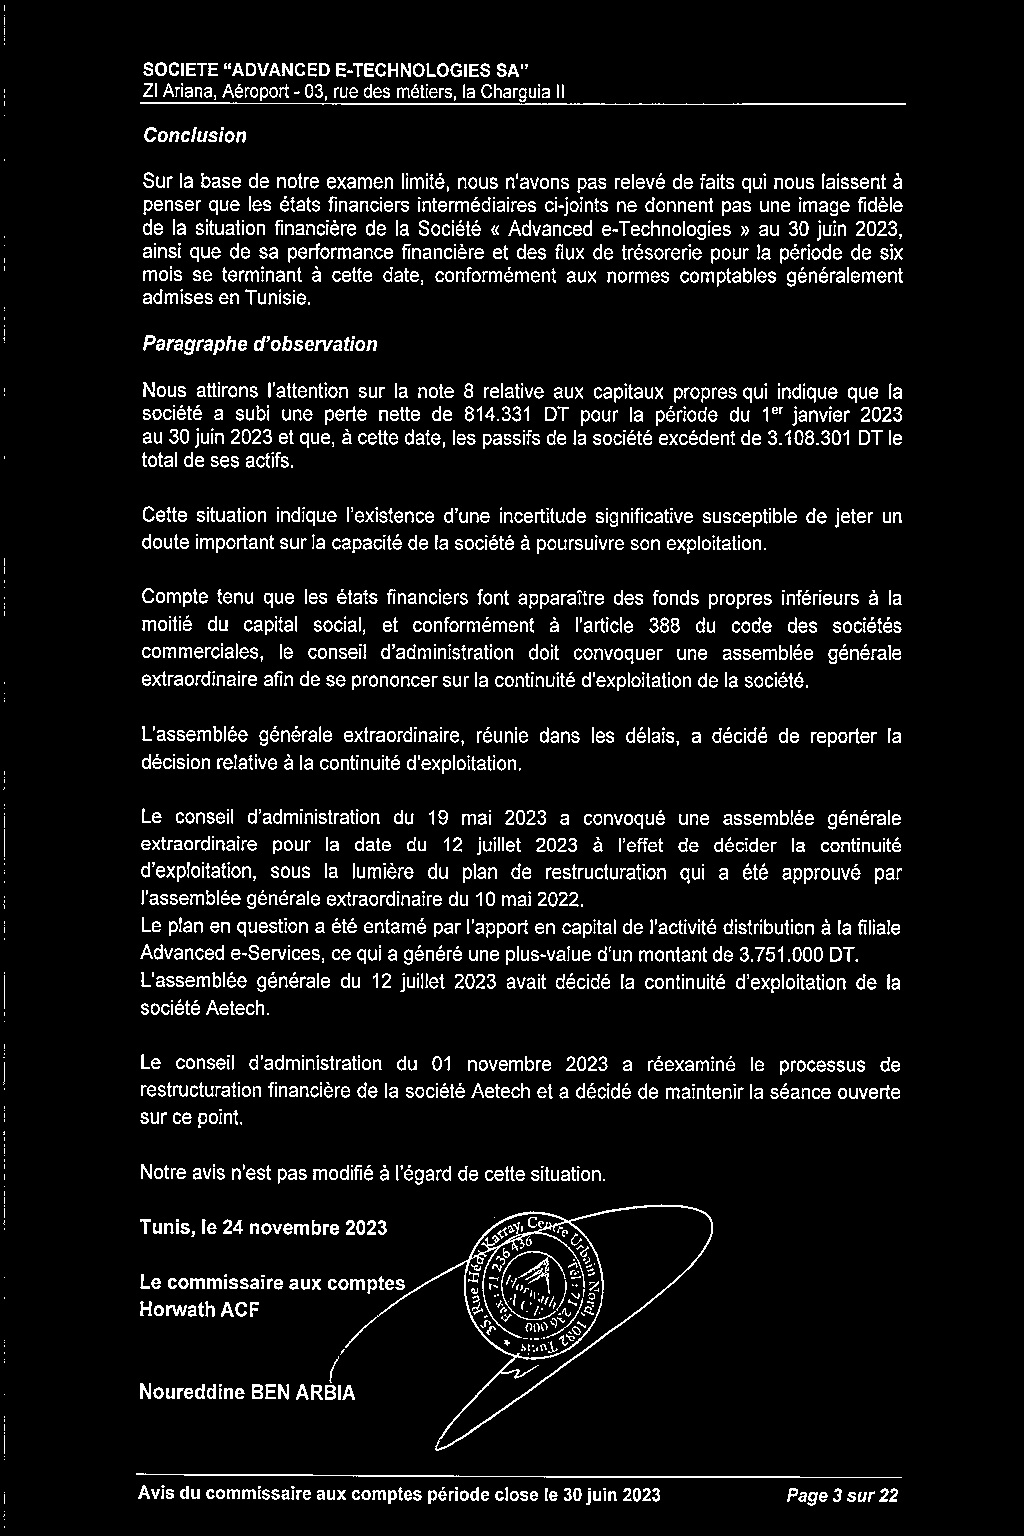

In [14]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

pdf_path = "aetech_efi300623.pdf"
images = convert_from_path(pdf_path)

# Iterate through the images
for pdf_image in images:
    # Convert PIL image to NumPy array
    image_array = np.array(pdf_image)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

    # Resize the image
    resized_image = cv2.resize(gray_image, (1024, 1536), interpolation=cv2.INTER_CUBIC)

    # Apply adaptive thresholding to get a binary image
    binary_image = cv2.adaptiveThreshold(resized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Invert the binary image to get a black background and white ecriture
    inverted_image = cv2.bitwise_not(binary_image)

    # Display the image
    cv2_imshow(inverted_image)